In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
from matplotlib.pyplot import subplots
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
# Set the start and end dates for the dataset
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2020, 1, 1)

In [3]:
# Define a function called gather_data that takes in several parameters
def gather_data(data_code, start,
                end):

    # Initialize a flag variable to False
    df_init = False
    
    # Loop through each key-value pair in data_codes
    for key, code in data_codes.items():
        # Check if a DataFrame has been created yet
        if df_init == False:
            # If not, create a new DataFrame and store the retrieved data
            df = web.DataReader(code, 'fred', start, end) # first() or last() or median
            df.rename(columns= {code:key}, inplace= True)
            df_init = True
        else:
            # If a DataFrame has already been created, add the retrieved data to it
            df[key] = web.DataReader(code, 'fred', start, end)
    
    # Return the final DataFrame
    return df

### Real GDP and Unemployment Rate

GDPC1 (Gross Domestic Product, 1st Quarter, Chained) and UNRATE (Unemployment Rate) are two important economic indicators that are closely related to each other. GDPC1 measures the total value of goods and services produced in an economy, while UNRATE measures the percentage of the labor force that is unemployed but actively seeking employment.

Economists often use the relationship between GDP and unemployment to measure the health of an economy. When GDP is growing, it usually means that businesses are producing more goods and services, which leads to more employment opportunities and a lower unemployment rate. Conversely, when GDP is shrinking, businesses may lay off workers, leading to higher unemployment rates.

One theory that explains the relationship between GDP and unemployment is the Phillips Curve. The Phillips Curve suggests that there is an inverse relationship between inflation and unemployment. As unemployment falls, firms must compete for scarce workers, driving up wages and increasing production costs. This, in turn, leads to higher prices and inflation. The Phillips Curve also suggests that as unemployment rises, firms have less bargaining power, leading to lower wages and lower production costs, which can lead to lower prices and deflation.

The Phillips Curve provides a useful framework for understanding the relationship between GDP and unemployment, as changes in the unemployment rate can impact the inflation rate and, ultimately, the overall level of economic activity. For example, if the unemployment rate is high, this may lead to lower wages and production costs, which can lead to lower prices and lower levels of economic activity. Conversely, if the unemployment rate is low, this may lead to higher wages and production costs, which can lead to higher prices and higher levels of economic activity.

In summary, GDPC1 and UNRATE are important economic indicators that are closely related to each other. The Phillips Curve theory provides a useful framework for understanding the relationship between GDP and unemployment and how changes in one can impact the other. By monitoring these indicators, policymakers and economists can gain insights into the health of an economy and take appropriate measures to promote sustainable economic growth and development.

In [4]:
data_codes = {'GDP' : 'GDPC1',
                'Unemployment' : 'UNRATE'}

data_df = gather_data(data_code=data_codes, start=start, end=end)

In [5]:
data_df

,GDP,Unemployment
DATE,,
1960-01-01,3277.847,5.2
1960-04-01,3260.177,5.2
1960-07-01,3276.133,5.5
1960-10-01,3234.087,6.1
1961-01-01,3255.914,6.6
...,...,...
2019-01-01,18835.411,4.0
2019-04-01,18962.175,3.6
2019-07-01,19130.932,3.7


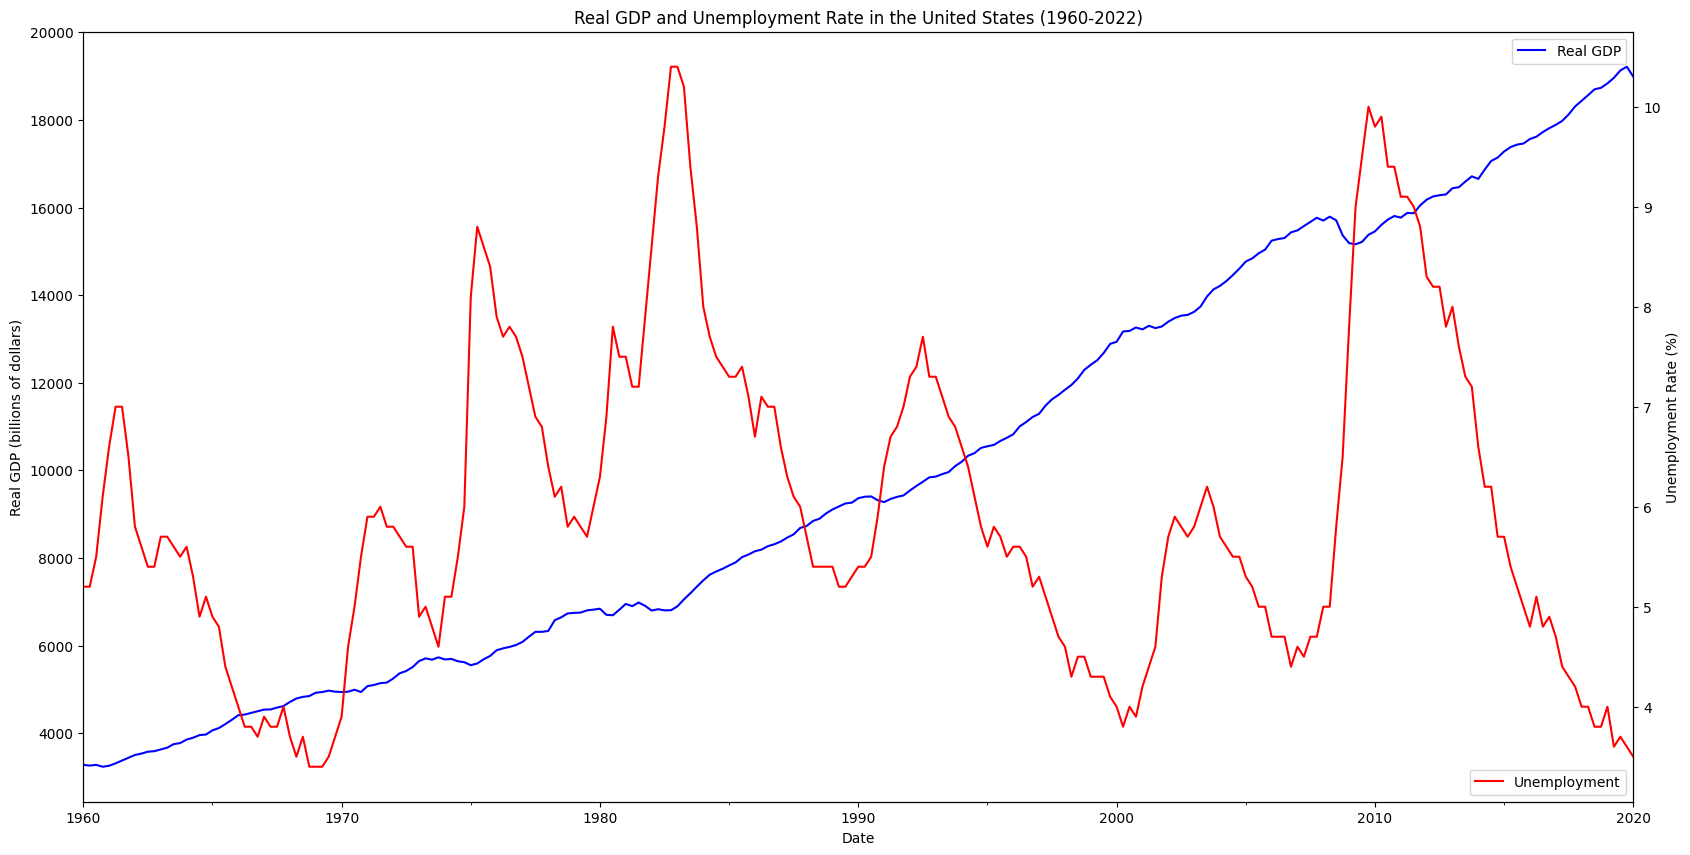

In [6]:
# Create a figure and axes object
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the 'data' DataFrame on the axes object
data_df.plot.line(ax=ax, y ='GDP', color = 'blue' )

# Add secondary y-axis
ax1 = ax.twinx()
data_df.plot.line(ax=ax1, y='Unemployment', color='red')

# Set labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Real GDP (billions of dollars)')
ax1.set_ylabel('Unemployment Rate (%)')
ax.set_title('Real GDP and Unemployment Rate in the United States (1960-2022)')
ax.legend(['Real GDP'])
ax1.legend(['Unemployment'], loc='lower right')

As we can see from the plot, there is an inverse relationship between real GDP and the unemployment rate. When the economy is doing well and the GDP is growing, the unemployment rate tends to decrease, and vice versa. This is a well-known relationship in economics and is often used as a measure of the health of an economy.

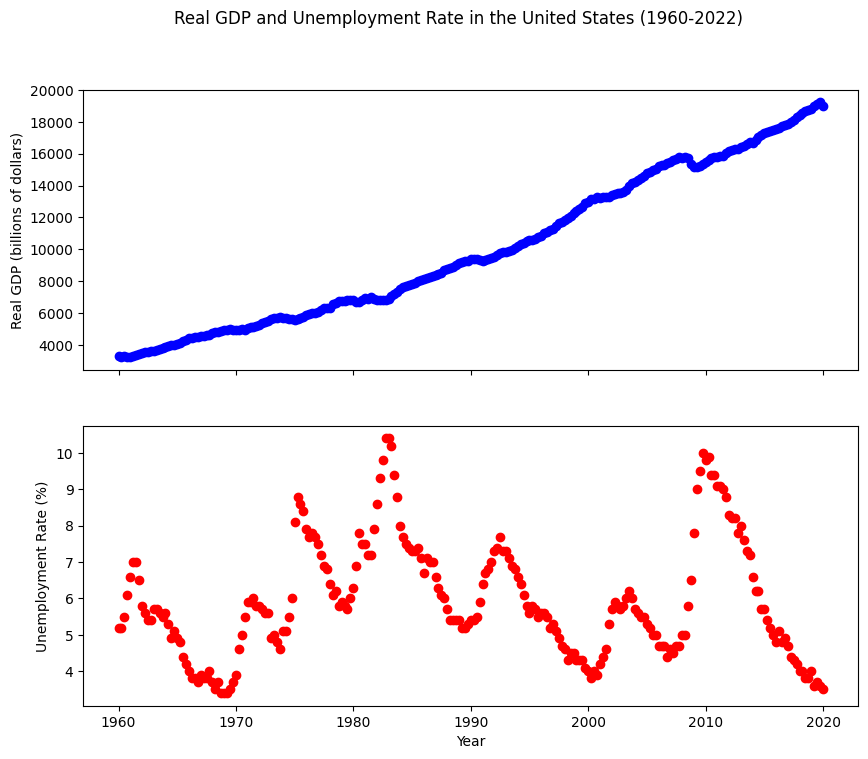

In [7]:
# Create a scatter plot for the data
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10, 8))
ax[0].scatter(data_df.index, data_df['GDP'], color='blue')
ax[0].set_ylabel('Real GDP (billions of dollars)')
ax[1].scatter(data_df.index, data_df['Unemployment'], color='red')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Unemployment Rate (%)')
plt.suptitle('Real GDP and Unemployment Rate in the United States (1960-2022)')
plt.show()

# fig, ax = plt.subplots(figsize=(10, 8))
# ax.scatter(data_df.index, data_df['GDP'], color='blue', label='Real GDP')
# ax.set_xlabel('Year')
# ax.set_ylabel('Real GDP (billions of dollars)')
# ax2 = ax.twinx()
# ax2.scatter(data_df.index, data_df['Unemployment'], color='red', label='Unemployment Rate')
# ax2.set_ylabel('Unemployment Rate (%)')
# plt.legend(loc='upper left')
# plt.title('Real GDP and Unemployment Rate in the United States (1960-2022)')
# plt.show()


### Crude Oil Price (DCOILWTICO) and Inflation (CPALTT01USM657N)

DCOILWTICO and CPALTT01USM657N are two important economic indicators that are often used to track the performance of the economy. DCOILWTICO is the daily crude oil spot price and is used as a benchmark for oil prices globally. CPALTT01USM657N is the consumer price index (CPI) for all items, which measures the average change in prices paid by consumers for goods and services over time.

The relationship between DCOILWTICO and CPALTT01USM657N is complex and can be analyzed from different perspectives. One way to think about this relationship is through the lens of inflation. Crude oil is one of the most important commodities in the global economy, and changes in its price can have a significant impact on the cost of production for many goods and services. When crude oil prices rise, it can lead to higher costs for businesses, which may then pass these costs on to consumers in the form of higher prices. This can contribute to inflation, which is measured by the CPI.

From an economic theory perspective, the relationship between crude oil prices and inflation is often explained by the concept of the cost-push theory of inflation. This theory suggests that increases in the cost of production, such as higher crude oil prices, can lead to higher prices for goods and services. In other words, higher input costs can cause producers to increase the prices of their products to maintain their profit margins.

However, it's worth noting that the relationship between DCOILWTICO and CPALTT01USM657N is not always straightforward, and there are many other factors that can influence inflation. For example, changes in consumer demand, shifts in global trade patterns, and changes in monetary policy can all affect the rate of inflation.

In conclusion, DCOILWTICO and CPALTT01USM657N are two important economic indicators that are closely watched by policymakers, economists, and investors. While the relationship between these two variables is complex and can be influenced by many factors, understanding their economic relationship can provide valuable insights into the performance of the economy and the drivers of inflation.

In [8]:
# Define a function called gather_data that takes in several parameters
def gather_data(data_code, start,
                end=datetime.datetime.today(),
                freq='M'):

    # Initialize a flag variable to False
    df_init = False
    
    # Loop through each key-value pair in data_codes
    for key, code in data_codes.items():
        # Check if a DataFrame has been created yet
        if df_init == False:
            # If not, create a new DataFrame and store the retrieved data
            df = web.DataReader(code, 'fred', start, end).resample(freq).mean() # first() or last() or median
            df.rename(columns= {code:key}, inplace= True)
            df_init = True
        else:
            # If a DataFrame has already been created, add the retrieved data to it
            df[key] = web.DataReader(code, 'fred', start, end).resample(freq).mean()
    
    # Return the final DataFrame
    return df


start = datetime.datetime(1990, 1, 1)
end = datetime.datetime(2020, 1, 1)

In [9]:
data_codes = {'Inflation_Rate' : 'CPALTT01USM657N', 'Oil_Prices' : 'DCOILWTICO'}

oil_infl = gather_data(data_code= data_codes, start= start, end= end, freq= 'M')
oil_infl

,Inflation_Rate,Oil_Prices
DATE,,
1990-01-31,1.030928,22.863182
1990-02-28,0.470958,22.113000
1990-03-31,0.546875,20.387727
1990-04-30,0.155400,18.425500
1990-05-31,0.232739,18.199545
...,...,...
2019-09-30,0.078345,56.947000
2019-10-31,0.228619,53.963043
2019-11-30,-0.053624,57.048947


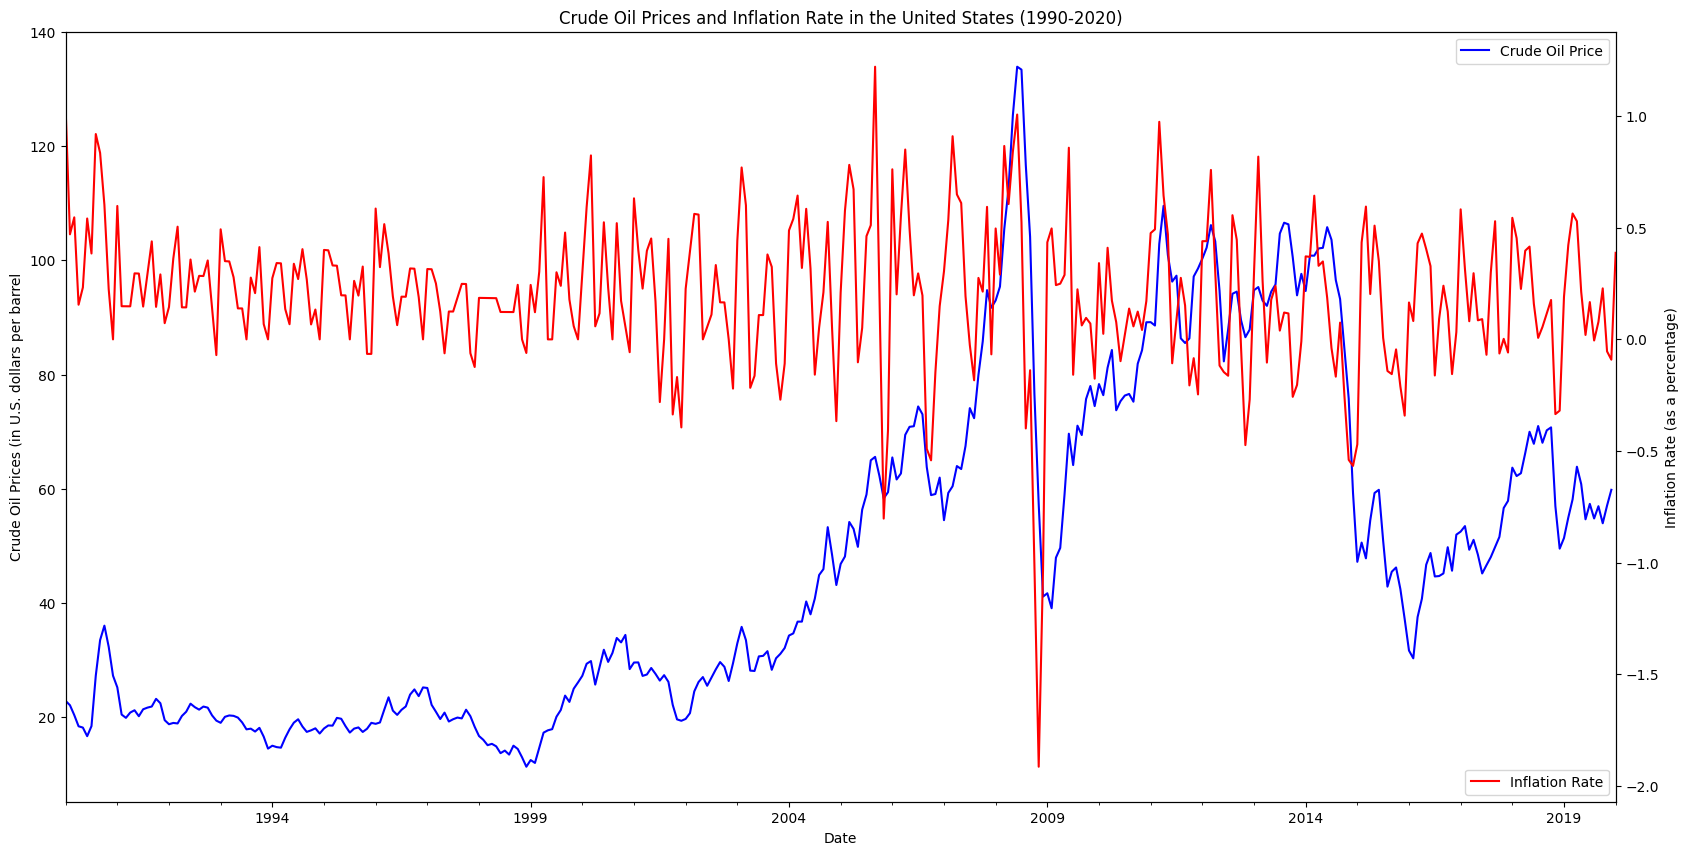

In [10]:
# Create a figure and axes object
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the 'data' DataFrame on the axes object
oil_infl.plot.line(ax=ax, y ='Oil_Prices', color = 'blue' )

# Add secondary y-axis
ax1 = ax.twinx()
oil_infl.plot.line(ax=ax1, y='Inflation_Rate', color='red')

# Set labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Crude Oil Prices (in U.S. dollars per barrel')
ax1.set_ylabel('Inflation Rate (as a percentage)')
ax.set_title('Crude Oil Prices and Inflation Rate in the United States (1990-2020)')
ax.legend(['Crude Oil Price'])
ax1.legend(['Inflation Rate'], loc='lower right')

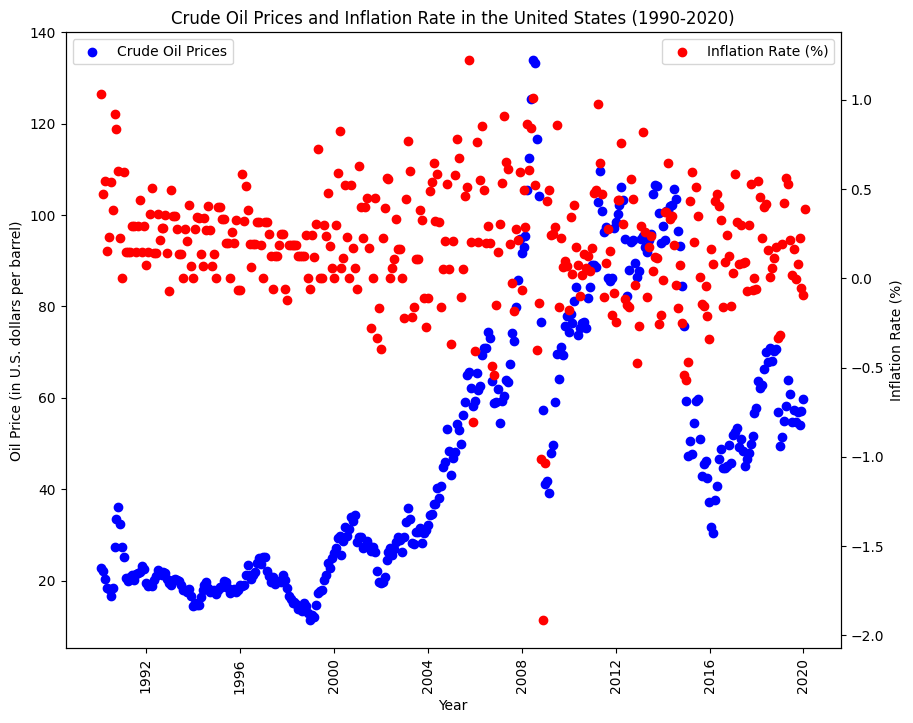

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(oil_infl.index, oil_infl['Oil_Prices'], color='blue', label='Crude Oil Prices')
ax.set_xlabel('Year')
#ax.set_xticks(oil_infl.index[::10])
ax.tick_params(axis='x', rotation=90)
#ax.set_xticks([])
ax.set_ylabel('Oil Price (in U.S. dollars per barrel)')
ax2 = ax.twinx()
ax2.scatter(oil_infl.index, oil_infl['Inflation_Rate'], color='red', label='Inflation Rate (%)')
ax2.set_ylabel('Inflation Rate (%)')
#ax2.set_xticks(oil_infl.index[::10])
ax.legend(loc='upper left')
ax2.legend()
plt.title('Crude Oil Prices and Inflation Rate in the United States (1990-2020)')
plt.show()

We can see that there is a positive relationship between crude oil prices and the inflation rate: as crude oil prices increase, the inflation rate tends to increase as well. This makes sense, as higher oil prices can lead to increased costs for transportation and production, which can drive up prices for goods and services.

### Energy Use and $CO_{2}$ Emissions

In [12]:
eng_co2 = pd.read_csv(r'energy_CO2.csv').set_index('Year')
eng_co2.head()

,Energy_Use,CO2_emissions
Year,,
1990,7671.773066,19.407346
1991,7631.467806,19.003403
1992,7677.401401,19.022860
1993,7709.496589,19.218333
1994,7757.830822,19.256212


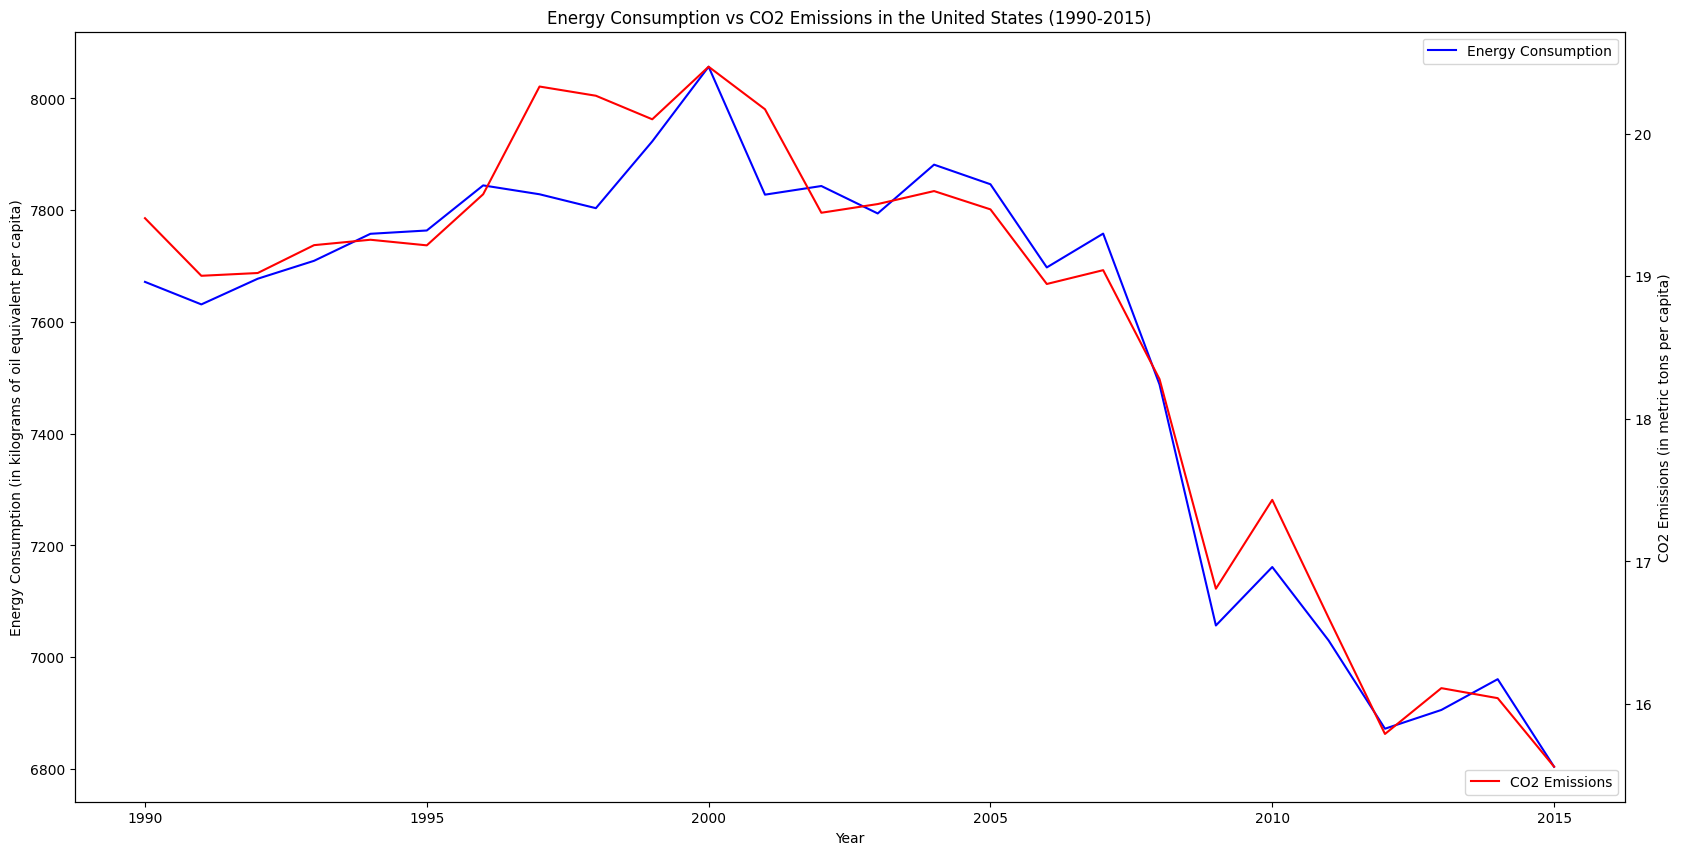

In [13]:
# Create a figure and axes object
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the 'data' DataFrame on the axes object
eng_co2.plot.line(ax=ax, y ='Energy_Use', color = 'blue' )

# Add secondary y-axis
ax1 = ax.twinx()
eng_co2.plot.line(ax=ax1, y='CO2_emissions', color='red')

# Set labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Energy Consumption (in kilograms of oil equivalent per capita)')
ax1.set_ylabel('CO2 Emissions (in metric tons per capita)')
ax.set_title('Energy Consumption vs CO2 Emissions in the United States (1990-2015)')
ax.legend(['Energy Consumption'])
ax1.legend(['CO2 Emissions'], loc='lower right')

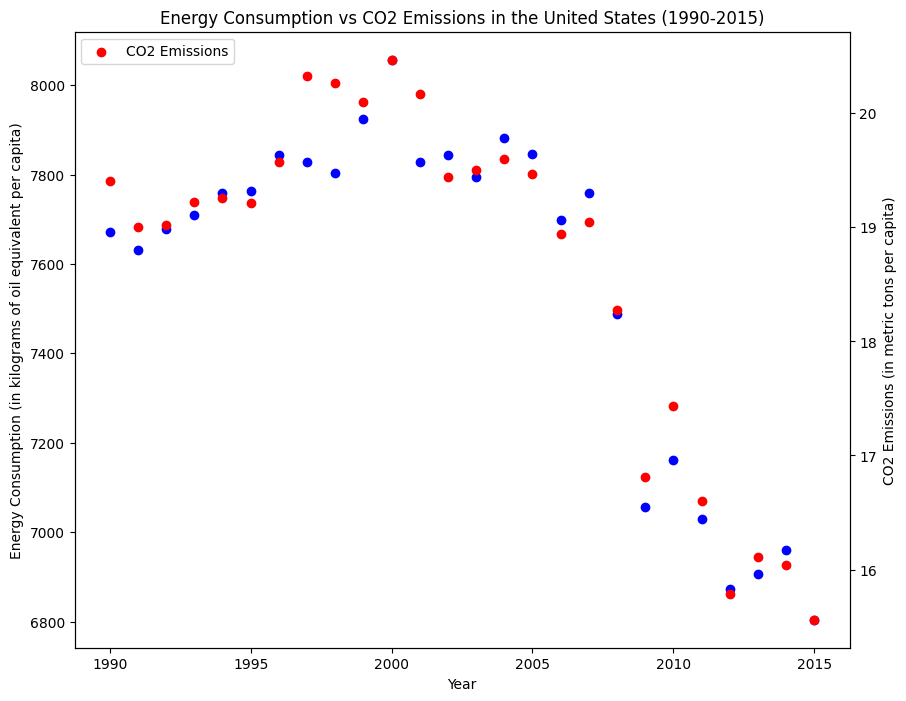

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(eng_co2.index, eng_co2['Energy_Use'], color='blue', label='Energy Consumption')
ax.set_xlabel('Year')
ax.set_ylabel('Energy Consumption (in kilograms of oil equivalent per capita)')
ax2 = ax.twinx()
ax2.scatter(eng_co2.index, eng_co2['CO2_emissions'], color='red', label='CO2 Emissions')
ax2.set_ylabel('CO2 Emissions (in metric tons per capita)')
plt.legend(loc='upper left')
plt.title('Energy Consumption vs CO2 Emissions in the United States (1990-2015)')
plt.show()

We can see from the scatter plot and line graph that there is a positive relationship between energy consumption and $CO_2$ emissions: as energy consumption increases, $CO_2$ emissions tend to increase as well. This is not surprising, as many forms of energy generation involve the burning of fossil fuels, which releases carbon dioxide into the atmosphere. This relationship underscores the importance of finding more sustainable and environmentally friendly sources of energy.

## Question 2

In [15]:
# Define start and end dates
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('2022-12-31')

# Download data
eco_indicator = pd.DataFrame()
eco_indicator['NGDP'] = web.DataReader('GDP', 'fred', start, end)['GDP']
eco_indicator['RGDP'] = web.DataReader('GDPC1', 'fred', start, end)['GDPC1']
eco_indicator['GDPDEF'] = web.DataReader('GDPDEF', 'fred', start, end)['GDPDEF']
eco_indicator['M1SL'] = web.DataReader('M1SL', 'fred', start, end)['M1SL']
eco_indicator['FEDFUNDS'] = web.DataReader('FEDFUNDS', 'fred', start, end)['FEDFUNDS']

# Resample to quarterly frequency
eco_indicator = eco_indicator.resample('Q').last()
eco_indicator

,NGDP,RGDP,GDPDEF,M1SL,FEDFUNDS
DATE,,,,,
1950-03-31,280.828,2186.365,12.845,NaN,NaN
1950-06-30,290.383,2253.045,12.888,NaN,NaN
1950-09-30,308.153,2340.112,13.168,NaN,NaN
1950-12-31,319.945,2384.920,13.415,NaN,NaN
1951-03-31,336.000,2417.311,13.900,NaN,NaN
...,...,...,...,...,...
2021-12-31,24349.121,20006.181,121.708,20053.6,0.08
2022-03-31,24740.480,19924.088,124.174,20576.8,0.08
2022-06-30,25248.476,19895.271,126.907,20618.2,0.33


In [16]:
eco_indicator.isna().sum()

NGDP         0
RGDP         0
GDPDEF       0
M1SL        36
FEDFUNDS    18
dtype: int64

In [17]:
#data = data.dropna()

In [18]:
eco_indicator

,NGDP,RGDP,GDPDEF,M1SL,FEDFUNDS
DATE,,,,,
1950-03-31,280.828,2186.365,12.845,NaN,NaN
1950-06-30,290.383,2253.045,12.888,NaN,NaN
1950-09-30,308.153,2340.112,13.168,NaN,NaN
1950-12-31,319.945,2384.920,13.415,NaN,NaN
1951-03-31,336.000,2417.311,13.900,NaN,NaN
...,...,...,...,...,...
2021-12-31,24349.121,20006.181,121.708,20053.6,0.08
2022-03-31,24740.480,19924.088,124.174,20576.8,0.08
2022-06-30,25248.476,19895.271,126.907,20618.2,0.33


In [19]:
# Calculate year-over-year percent changes
eco_indicator_pct = eco_indicator.pct_change(4).shift(-4)
eco_indicator_pct

,NGDP,RGDP,GDPDEF,M1SL,FEDFUNDS
DATE,,,,,
1950-03-31,0.196462,0.105630,0.082133,NaN,NaN
1950-06-30,0.184952,0.091499,0.085661,NaN,NaN
1950-09-30,0.140294,0.072547,0.063183,NaN,NaN
1950-12-31,0.113248,0.054714,0.055535,NaN,NaN
1951-03-31,0.070893,0.051700,0.018201,NaN,NaN
...,...,...,...,...,...
2021-12-31,0.073754,0.009063,0.064112,0.002683,37.5
2022-03-31,NaN,NaN,NaN,NaN,NaN
2022-06-30,NaN,NaN,NaN,NaN,NaN


In [20]:
# Create correlation matrix for original data
corr_original = eco_indicator.corr()

# Create correlation matrix for percent changes
corr_pct = eco_indicator_pct.corr()

In [21]:
corr_original

,NGDP,RGDP,GDPDEF,M1SL,FEDFUNDS
NGDP,1.000000,0.981865,0.967887,0.663013,-0.508215
RGDP,0.981865,1.000000,0.990220,0.579725,-0.436160
GDPDEF,0.967887,0.990220,1.000000,0.568992,-0.388723
M1SL,0.663013,0.579725,0.568992,1.000000,-0.357886
FEDFUNDS,-0.508215,-0.436160,-0.388723,-0.357886,1.000000


In [22]:
corr_pct

,NGDP,RGDP,GDPDEF,M1SL,FEDFUNDS
NGDP,1.000000,0.743056,0.633111,-0.076373,0.105161
RGDP,0.743056,1.000000,-0.047180,-0.058173,0.020751
GDPDEF,0.633111,-0.047180,1.000000,-0.048566,0.127183
M1SL,-0.076373,-0.058173,-0.048566,1.000000,-0.059013
FEDFUNDS,0.105161,0.020751,0.127183,-0.059013,1.000000


The correlation between the variables changes after calculating the year-over-year percent changes. This is because the percent changes capture the growth rates of the variables over time, rather than their absolute levels. For example, two variables that are positively correlated at one point in time may become negatively correlated if one variable grows faster than the other. By calculating the percent changes, we are able to capture these changes in the relationship between variables over time. Additionally, the percent changes allow us to compare variables with different units of measurement (e.g., GDP and the federal funds rate) on a common scale.

### Econ 611

In [23]:
def gather_data(data_codes, start_date, end_date=None, freq='M'):
    # If end_date is not specified, use today's date
    if end_date is None:
        end_date = pd.Timestamp.today()

    # Initialize an empty DataFrame
    df = pd.DataFrame()

    # Loop through each key-value pair in data_codes
    for key, code in data_codes.items():
        # Retrieve data from FRED
        data = web.DataReader(code, 'fred', start_date, end_date)

        # Resample the data to the specified frequency
        data = data.resample(freq).mean()

        # Rename the column to the specified key
        data.rename(columns={code: key}, inplace=True)

        # Merge the data into the DataFrame
        if df.empty:
            df = data
        else:
            df = df.merge(data, left_index=True, right_index=True, how='outer')

    return df


start_date = datetime.datetime(2018, 3, 5)
end_date = datetime.datetime(2023, 3, 3)

In [24]:
data_codes = {'1Year' : 'DGS1', '2Year' : 'DGS2', '5Year' : 'DGS5',
                '10Year' : 'DGS10', '30Year' : 'DGS30'}


US_treasury = gather_data(data_codes= data_codes, start_date= start_date, end_date= end_date, freq= 'M')

In [25]:
US_treasury.index = pd.to_datetime(US_treasury.index)
US_treasury

,1Year,2Year,5Year,10Year,30Year
DATE,,,,,
2018-03-31,2.063684,2.280000,2.632105,2.843158,3.088947
2018-04-30,2.153810,2.384286,2.701905,2.869048,3.071905
2018-05-31,2.273636,2.511818,2.816818,2.977727,3.131818
2018-06-30,2.328095,2.533333,2.775714,2.912381,3.050000
2018-07-31,2.387619,2.606667,2.777619,2.889048,3.006667
...,...,...,...,...,...
2022-11-30,4.728000,4.503500,4.055500,3.891000,3.999000
2022-12-31,4.681905,4.288571,3.764286,3.616190,3.659048
2023-01-31,4.694000,4.207500,3.643000,3.531500,3.664500


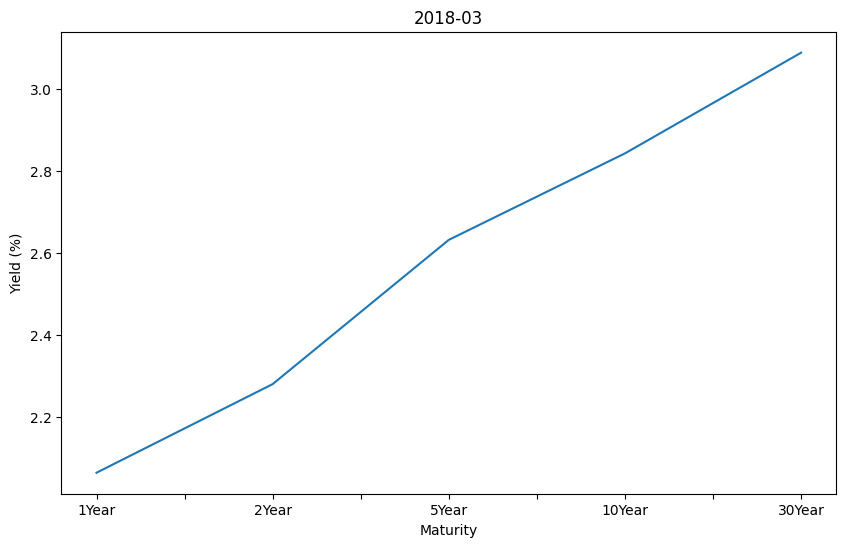

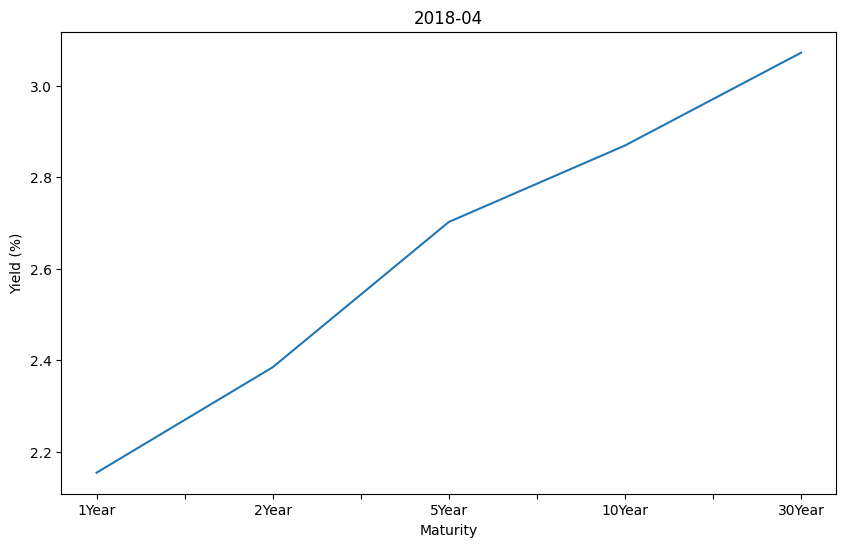

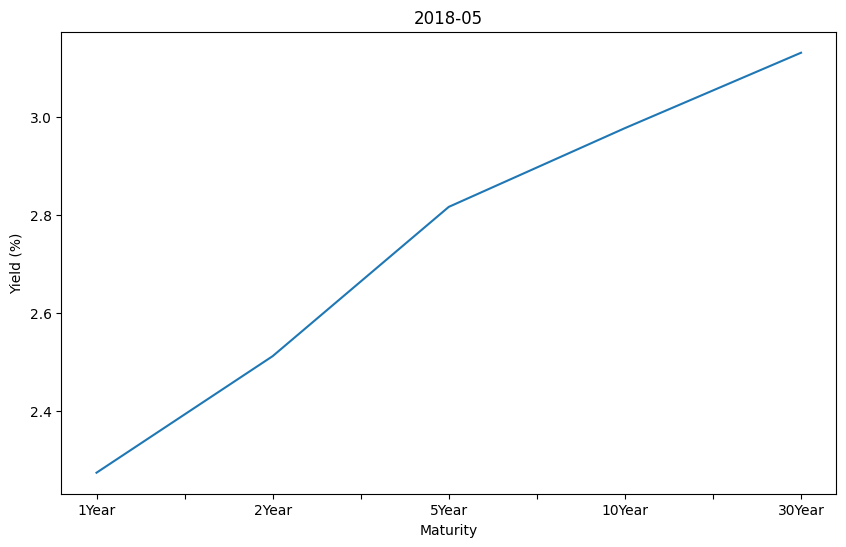

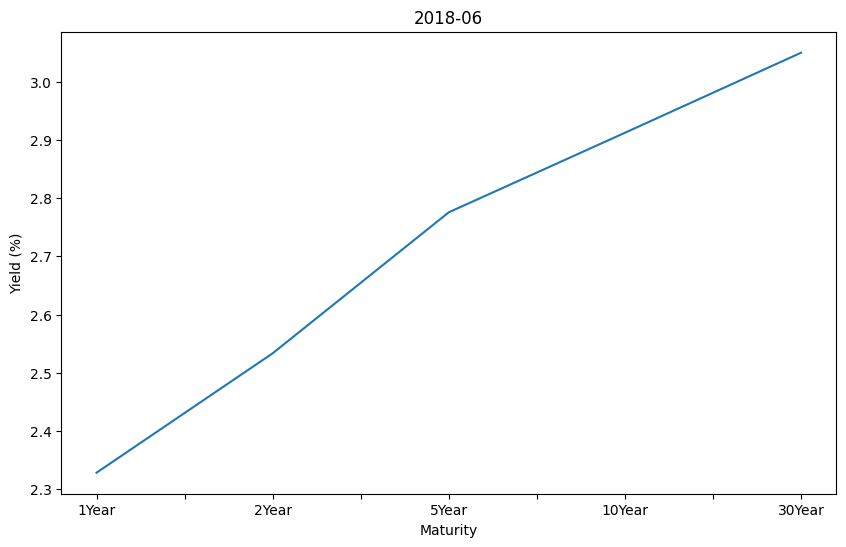

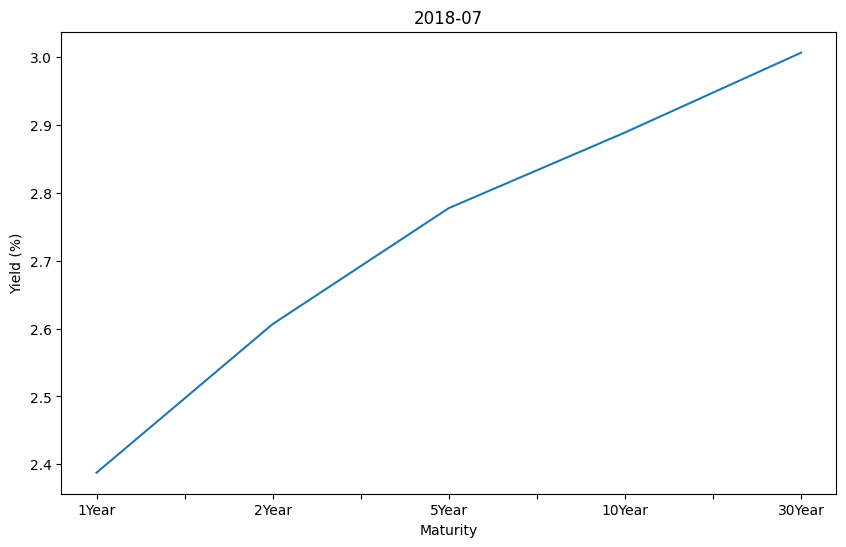

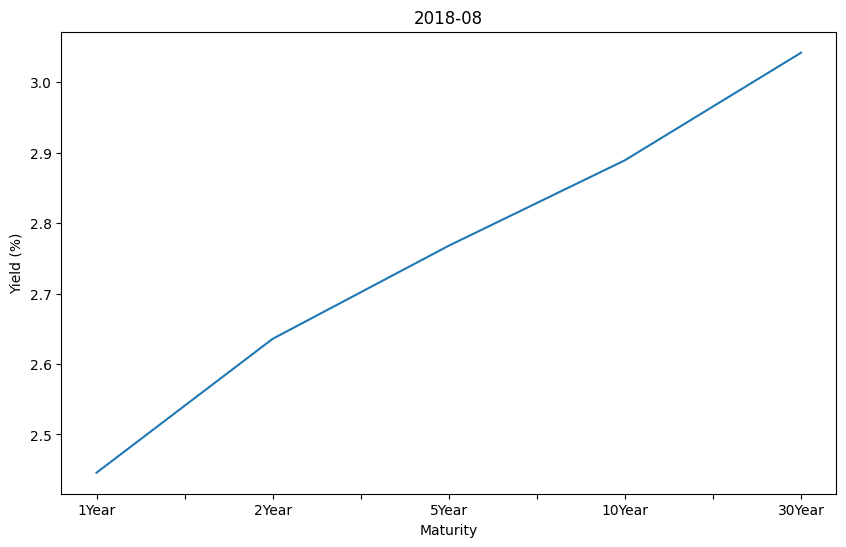

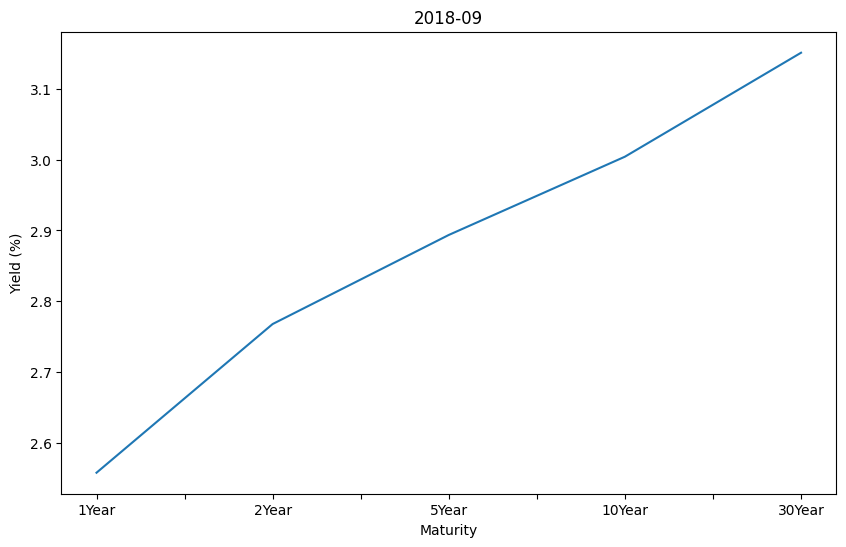

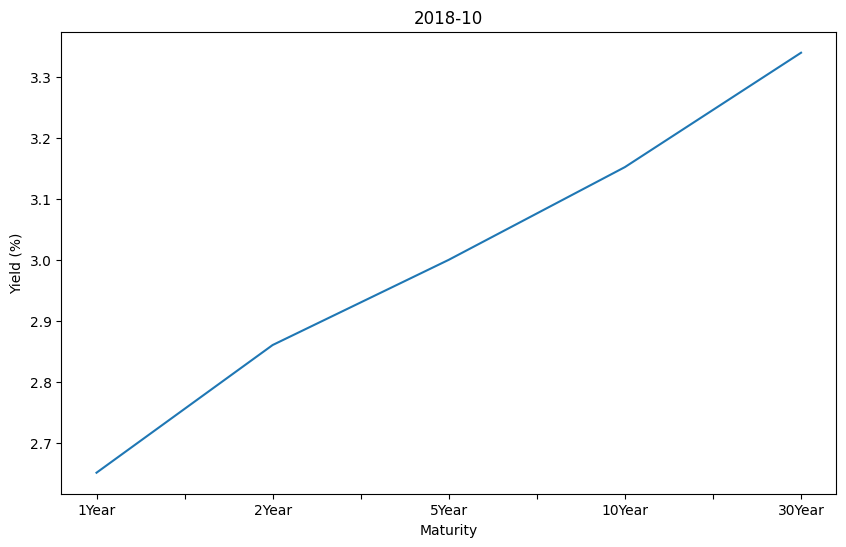

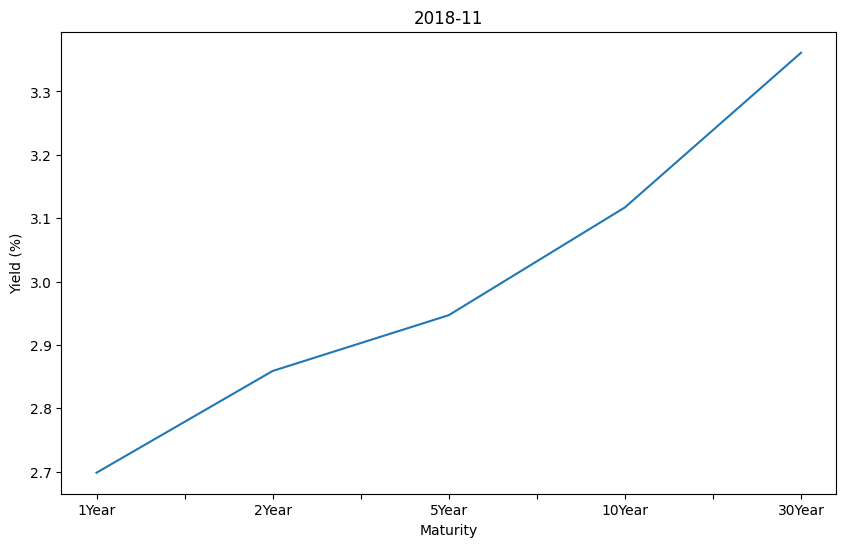

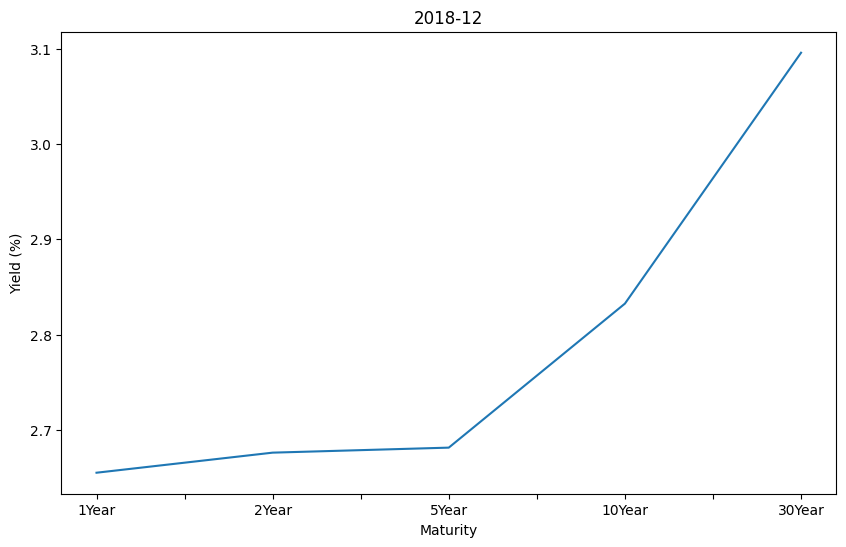

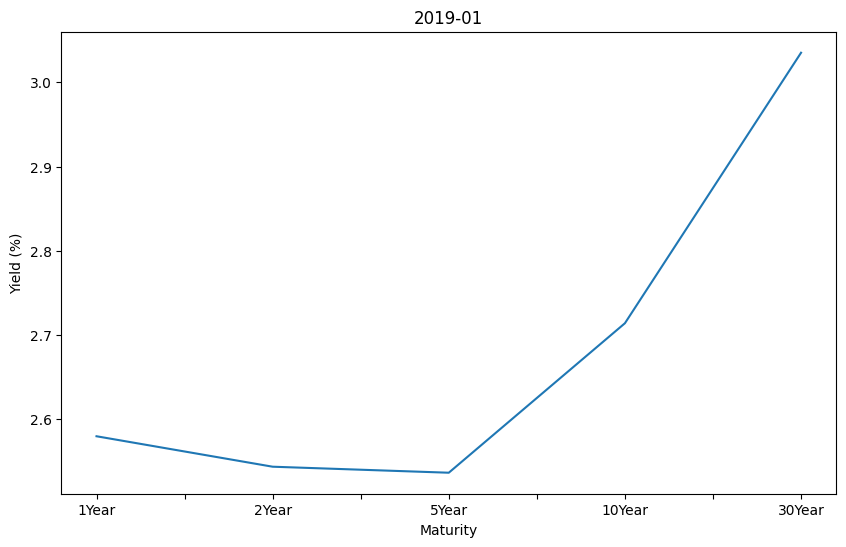

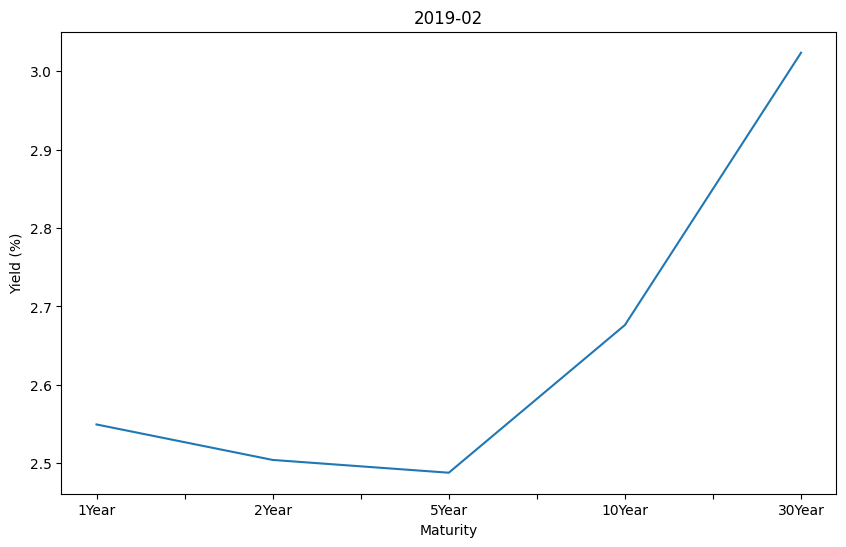

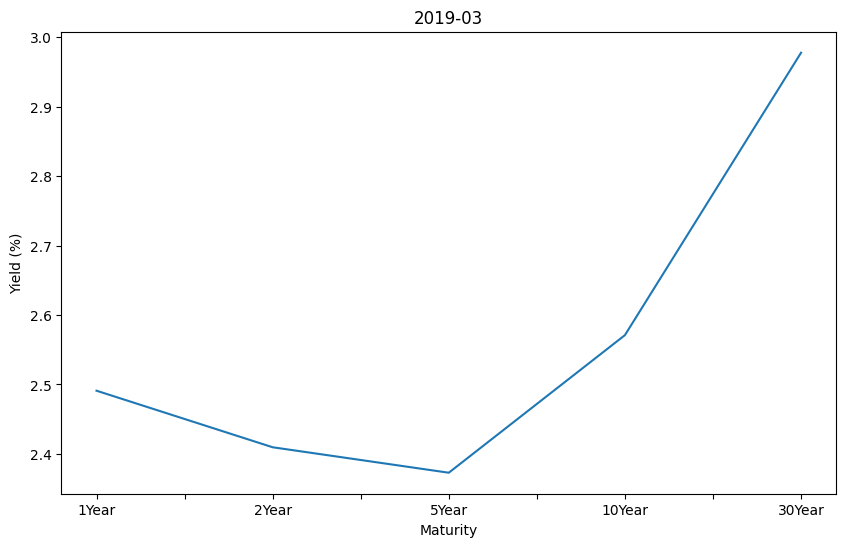

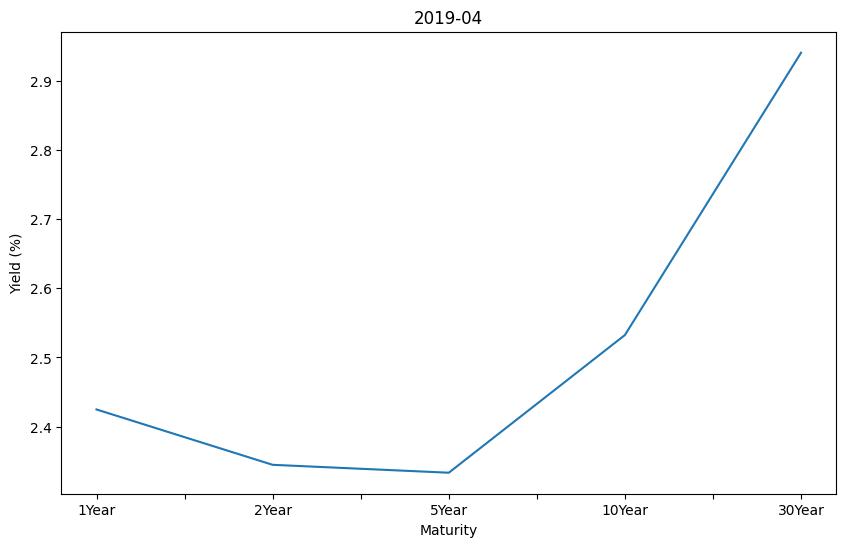

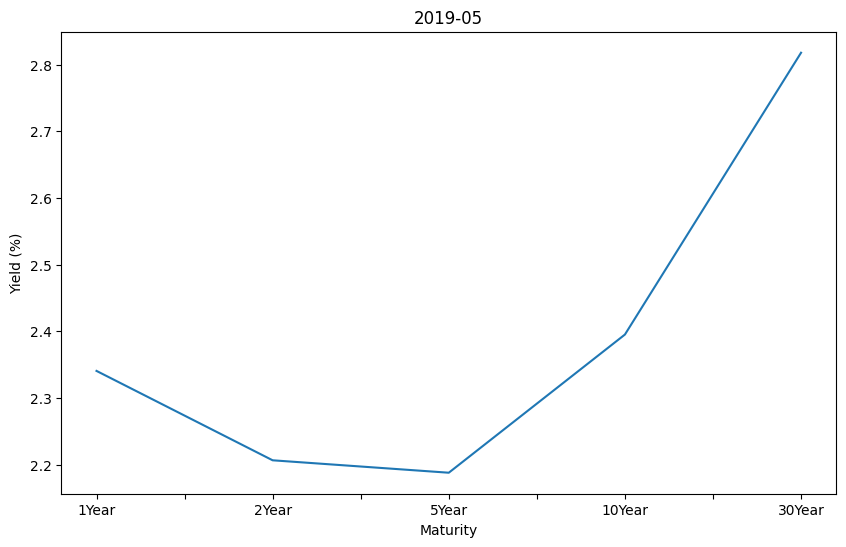

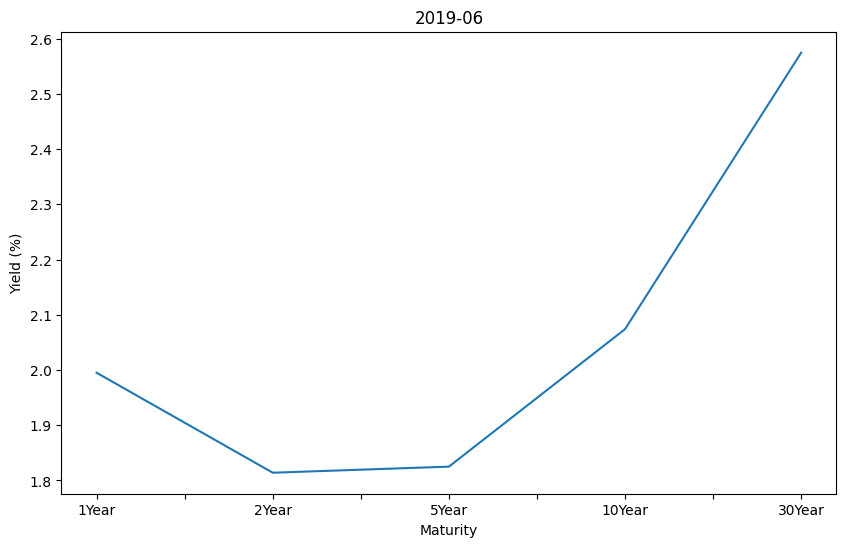

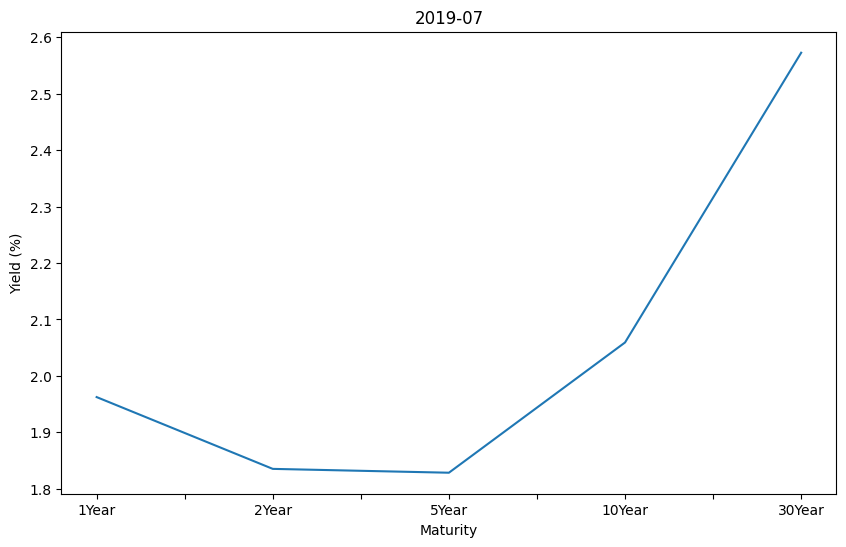

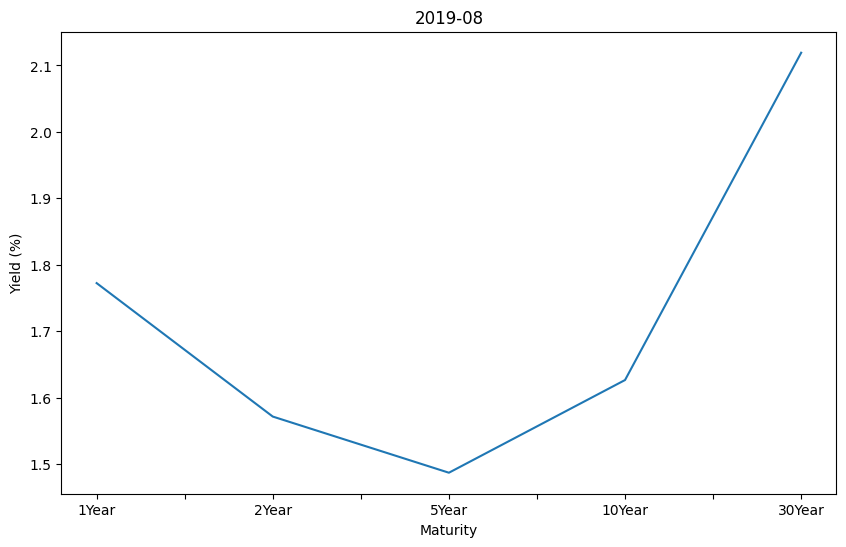

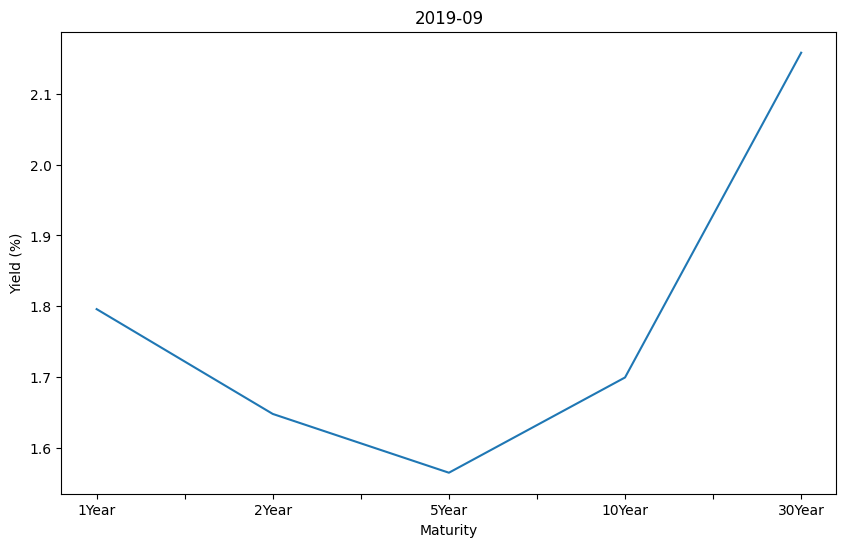

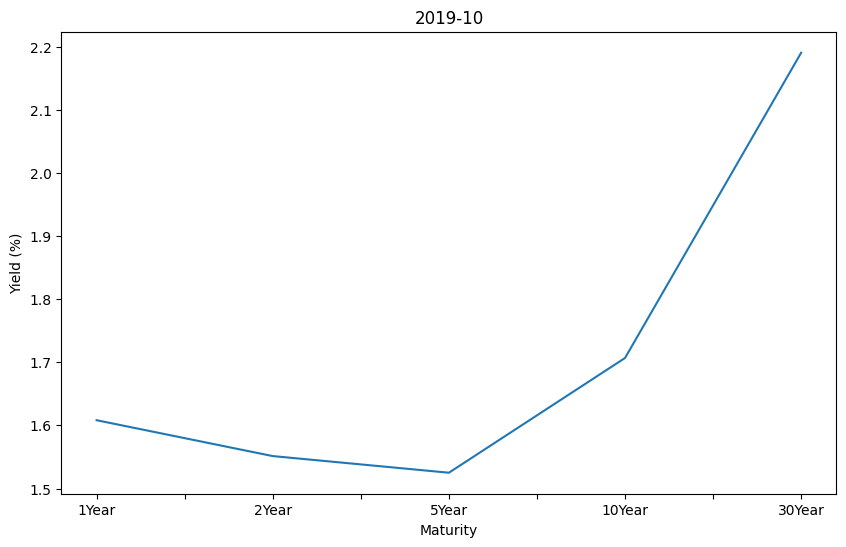

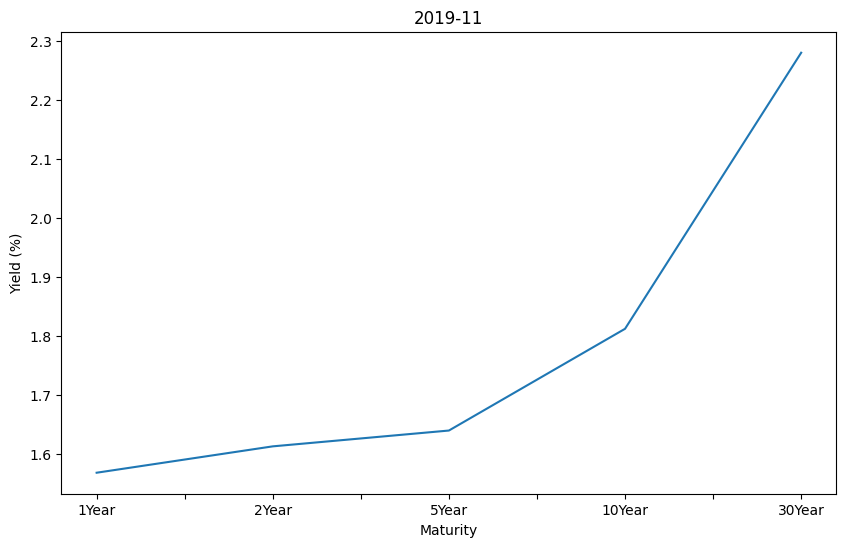

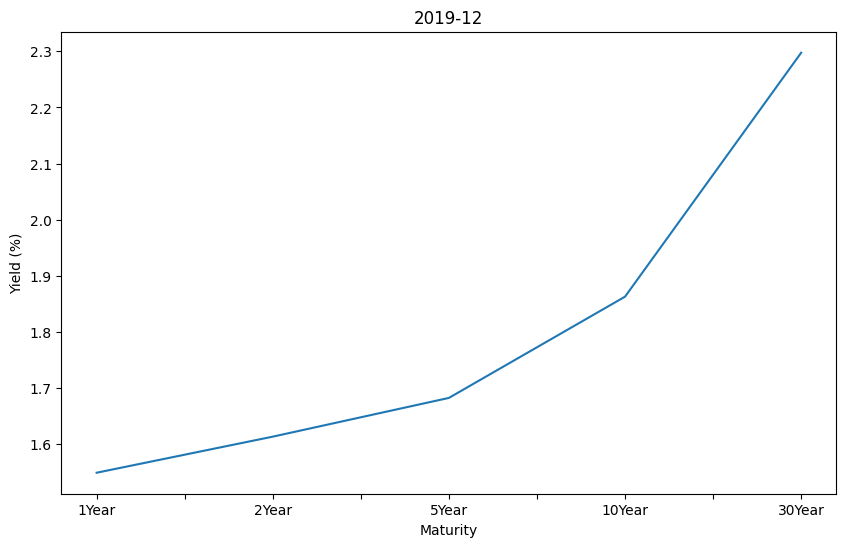

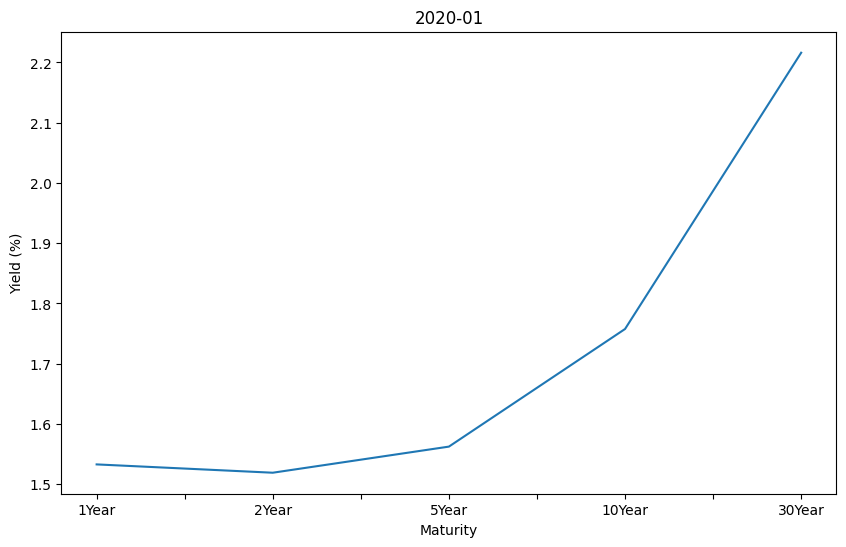

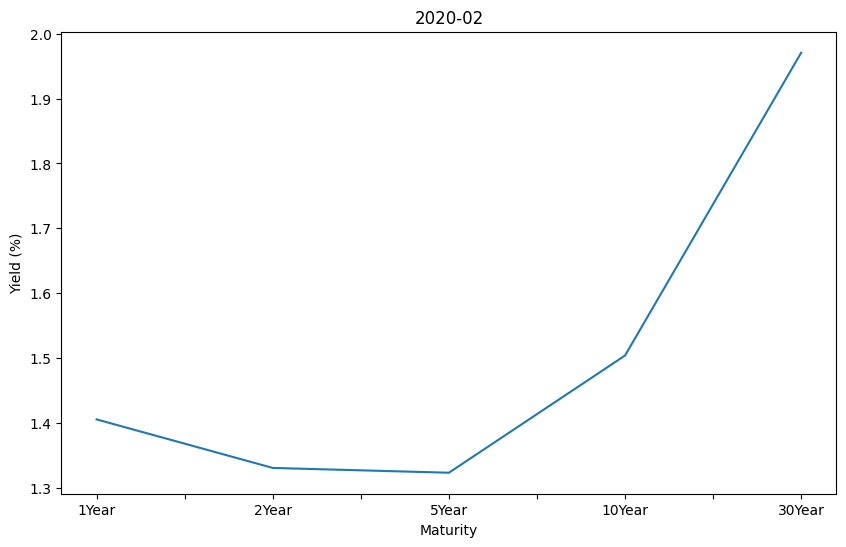

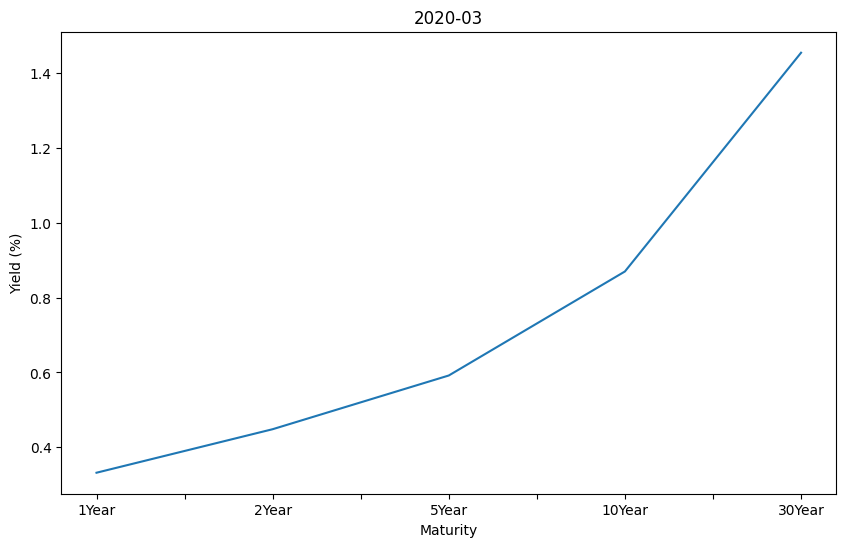

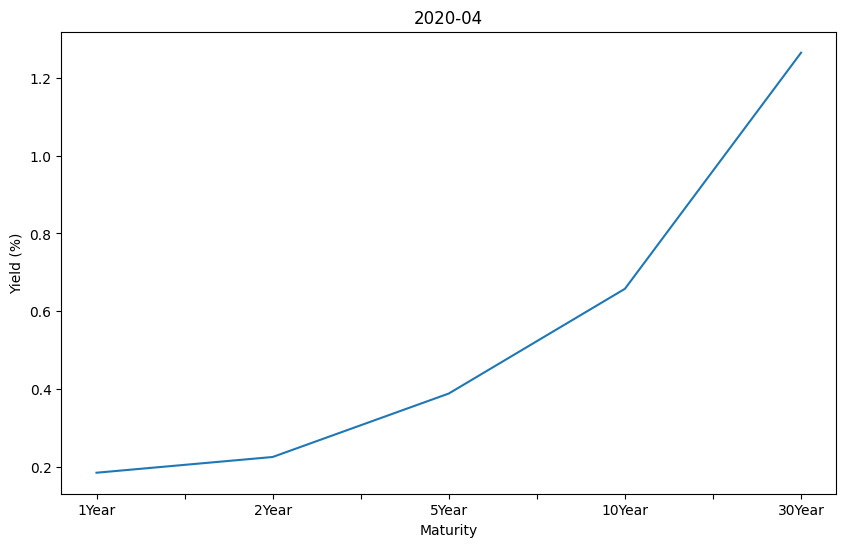

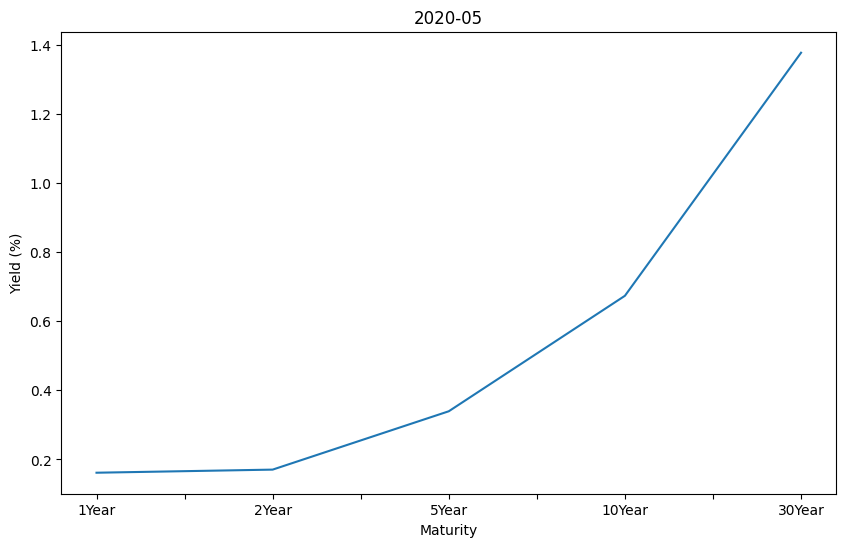

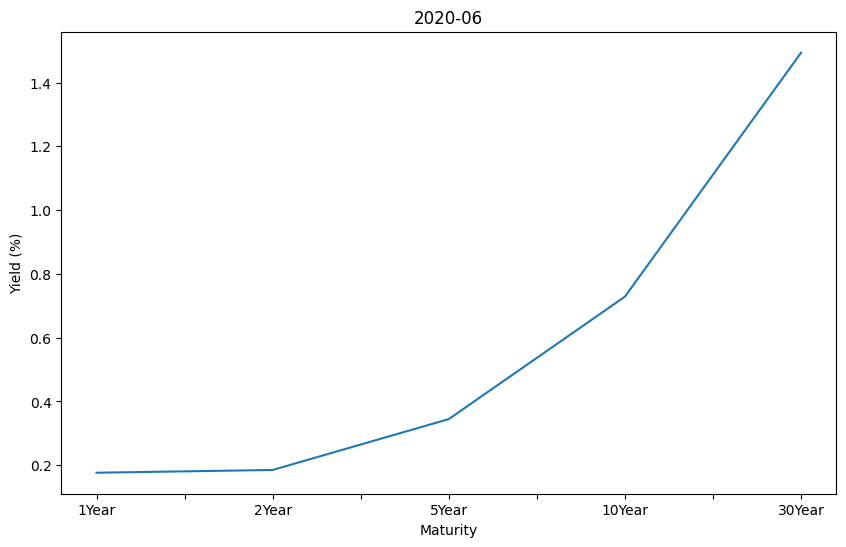

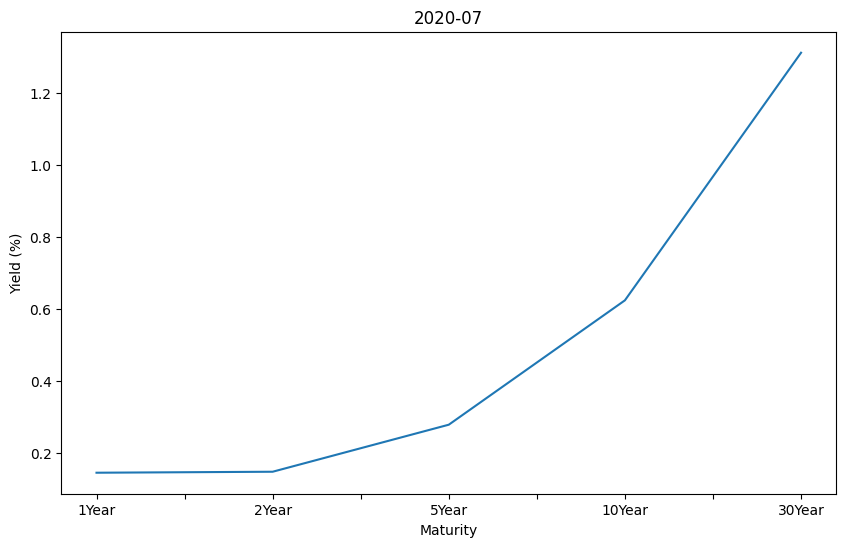

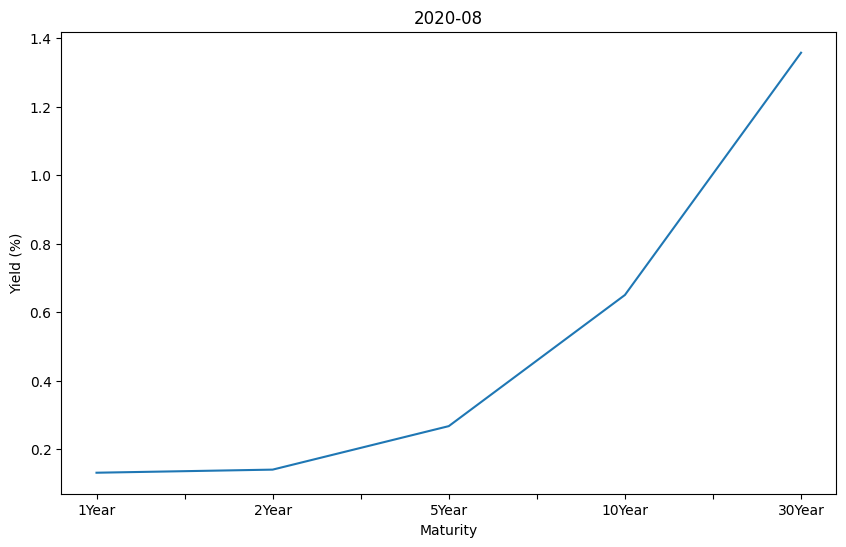

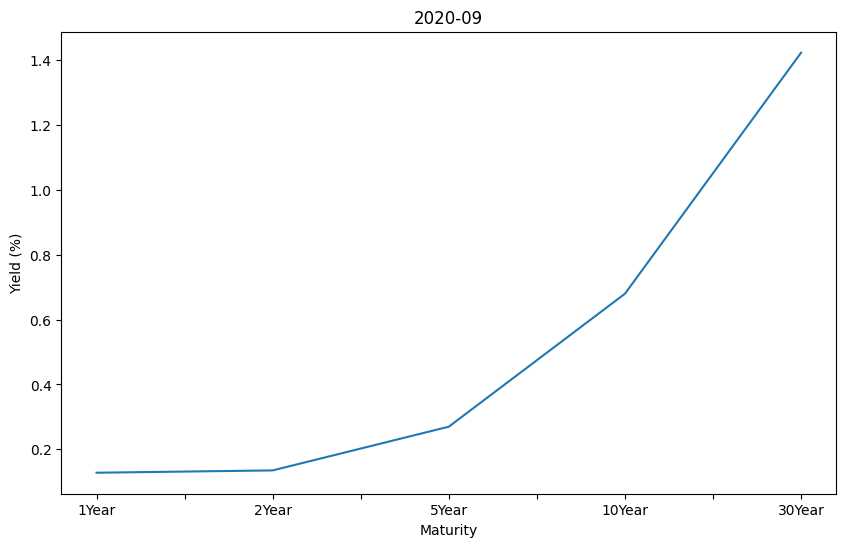

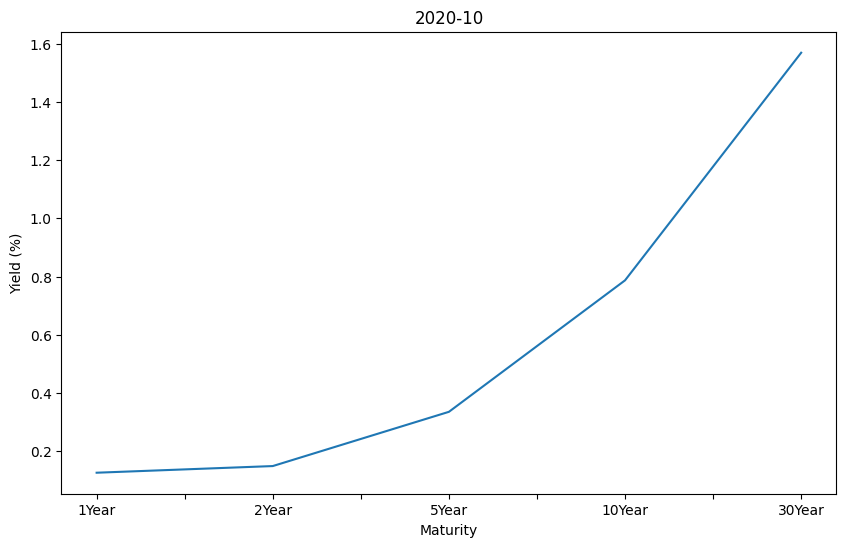

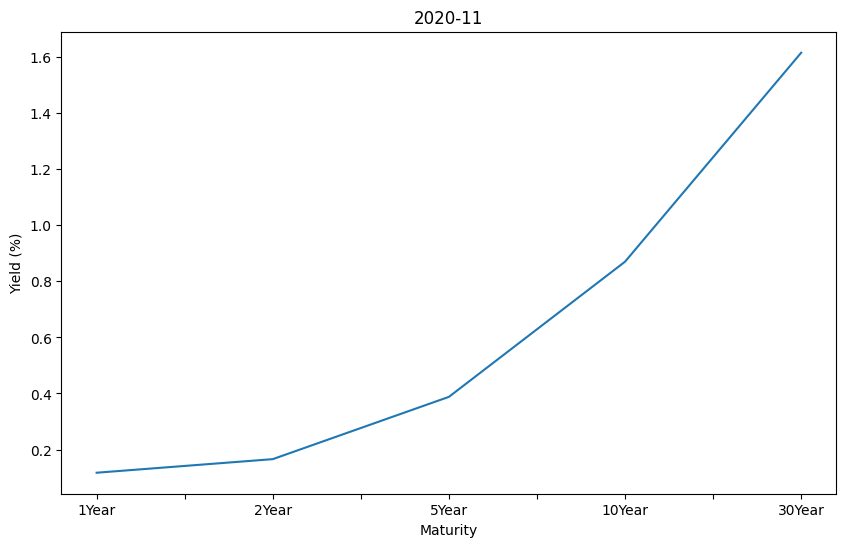

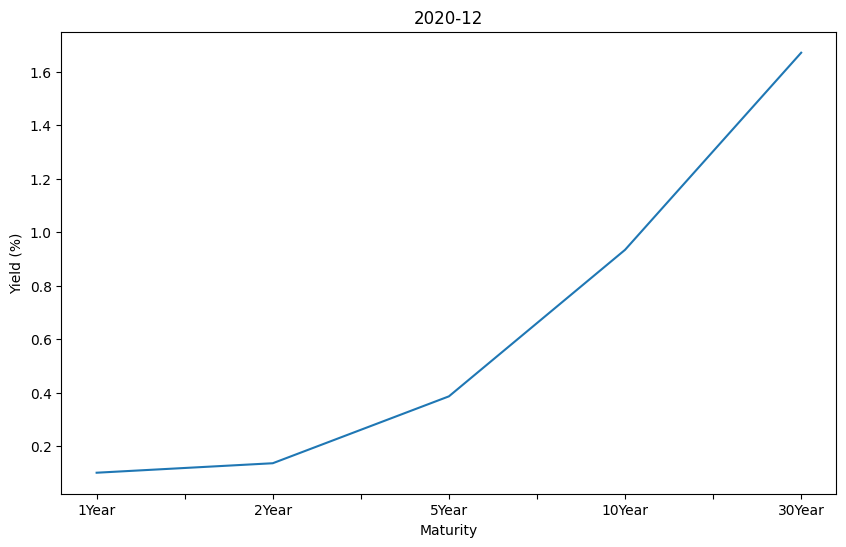

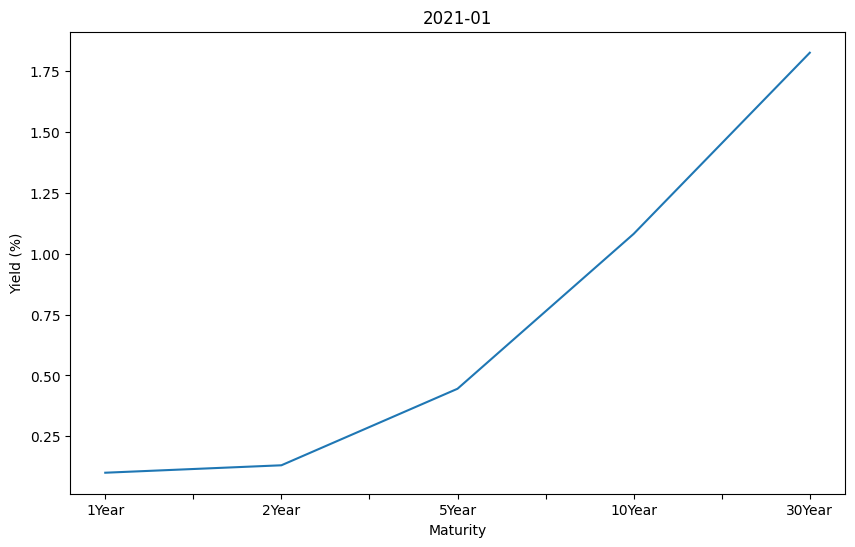

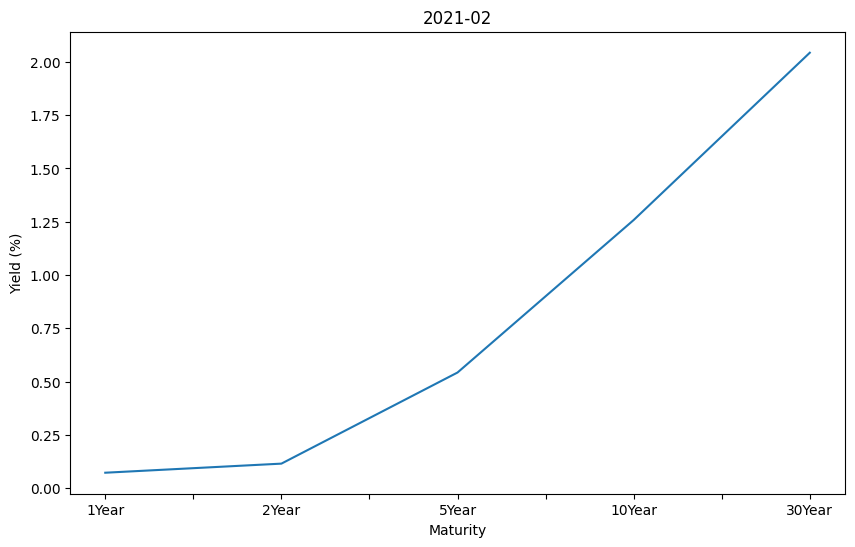

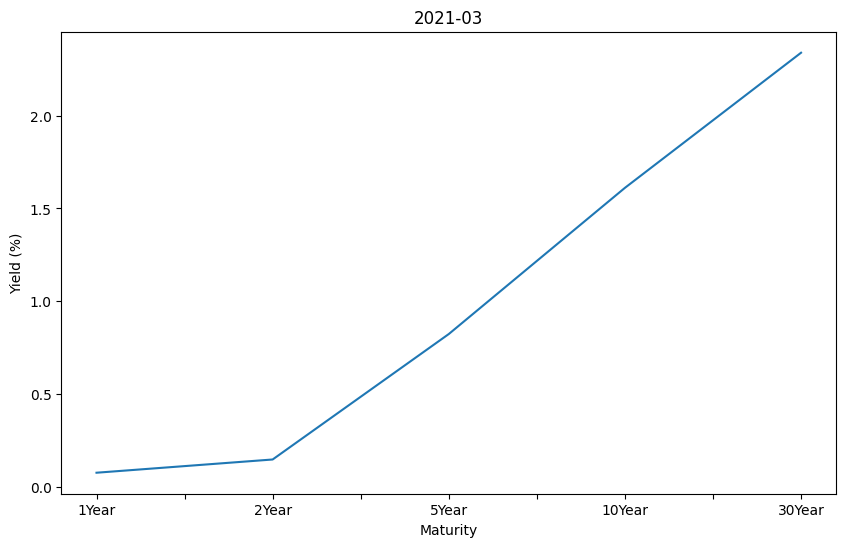

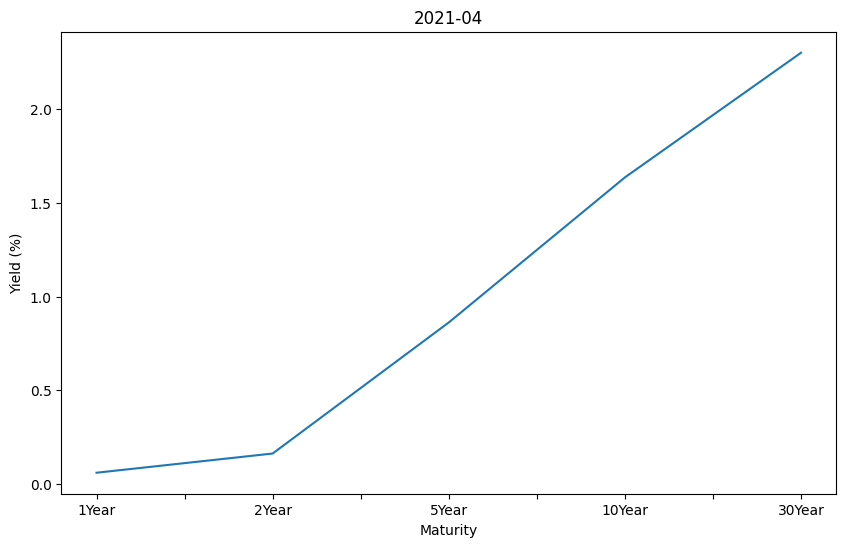

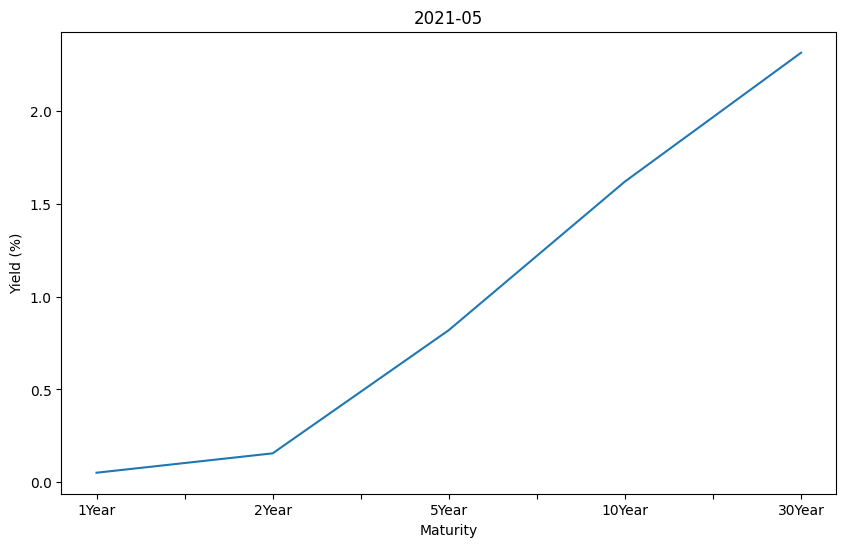

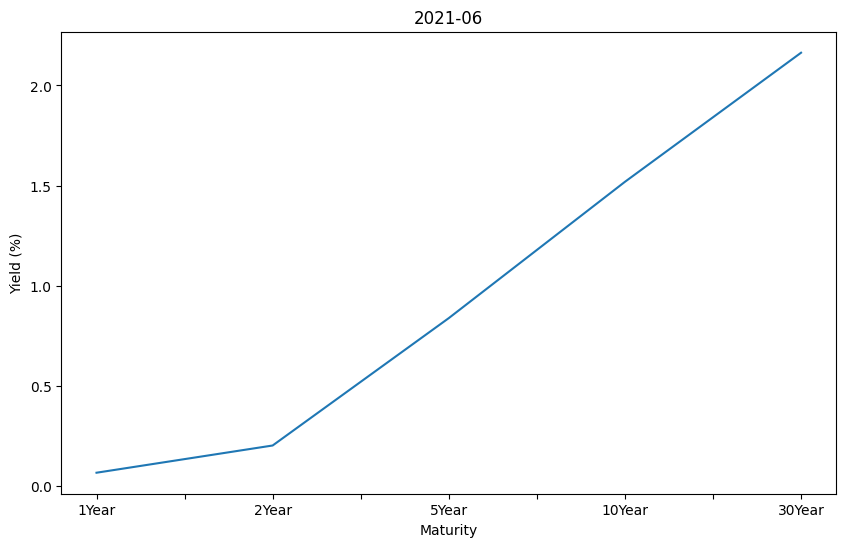

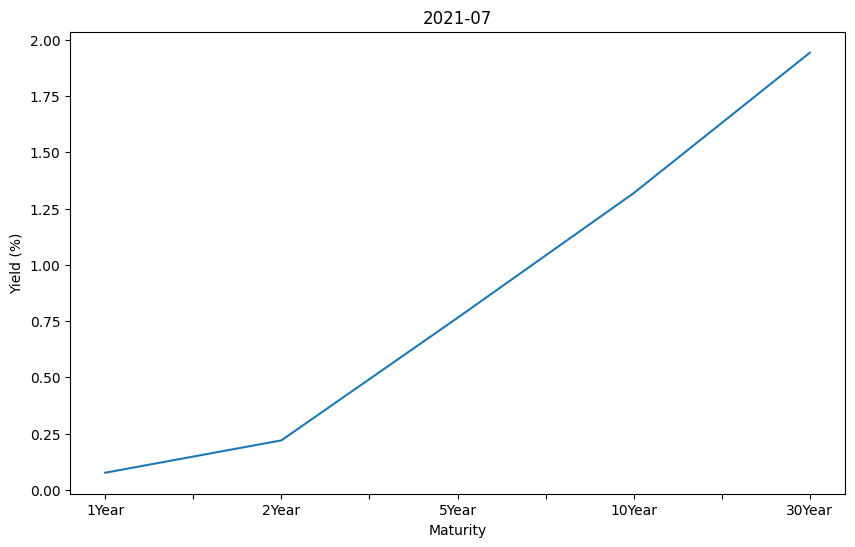

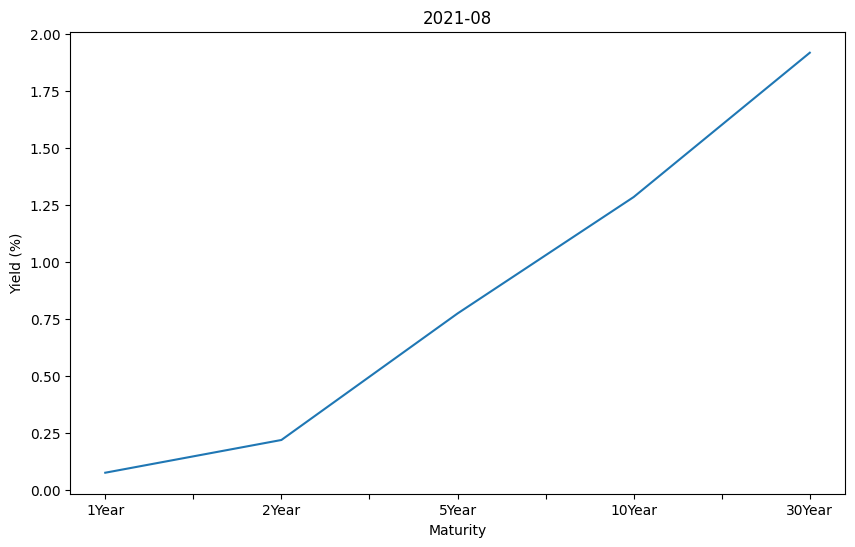

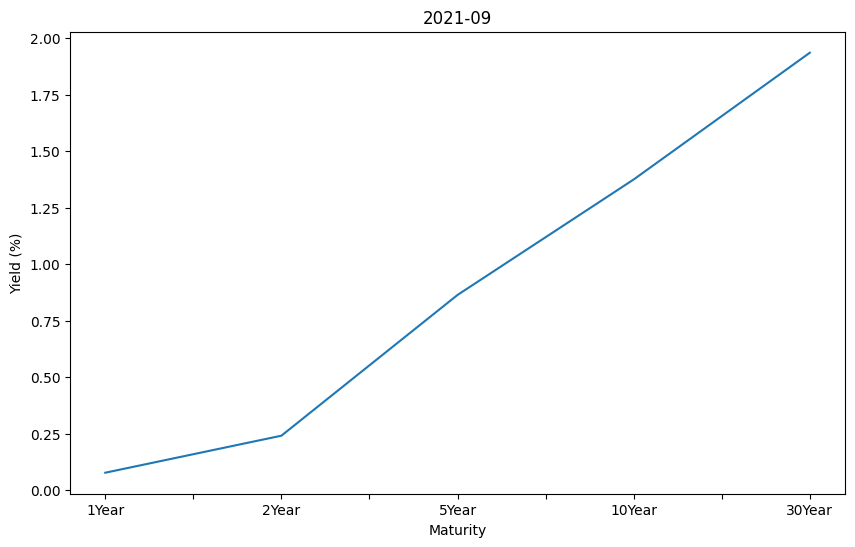

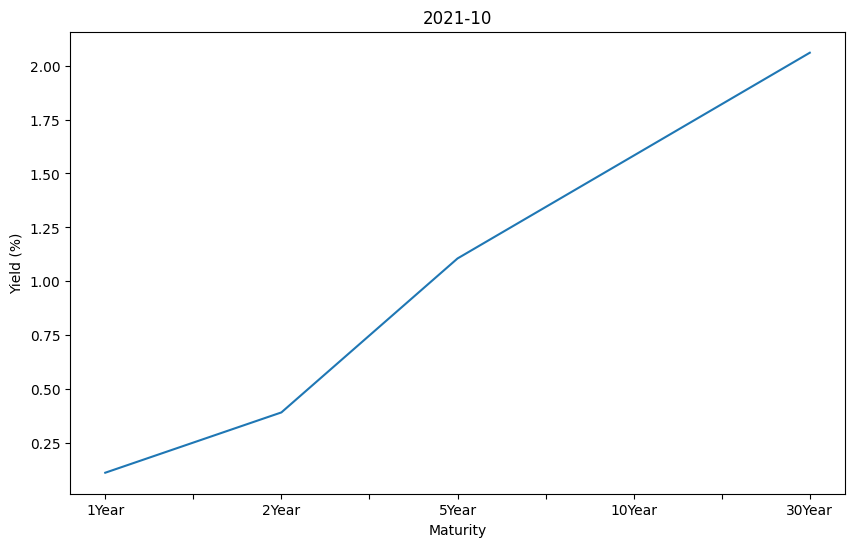

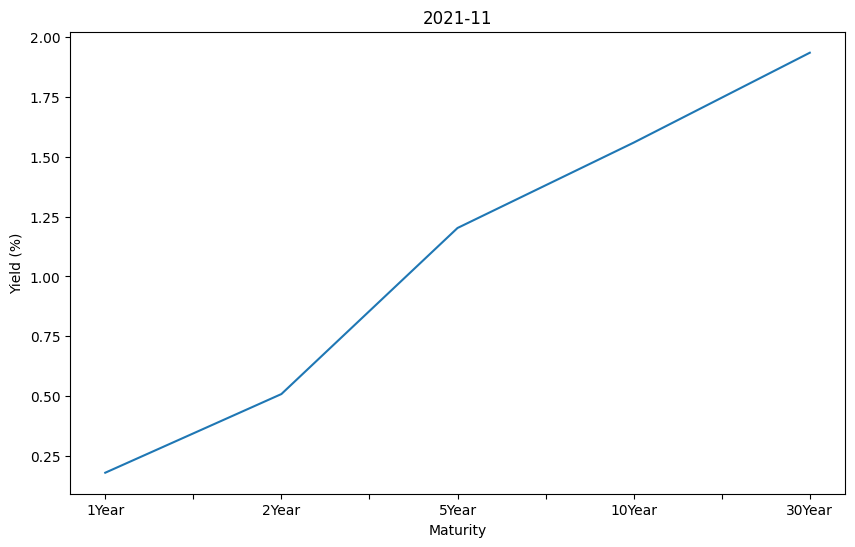

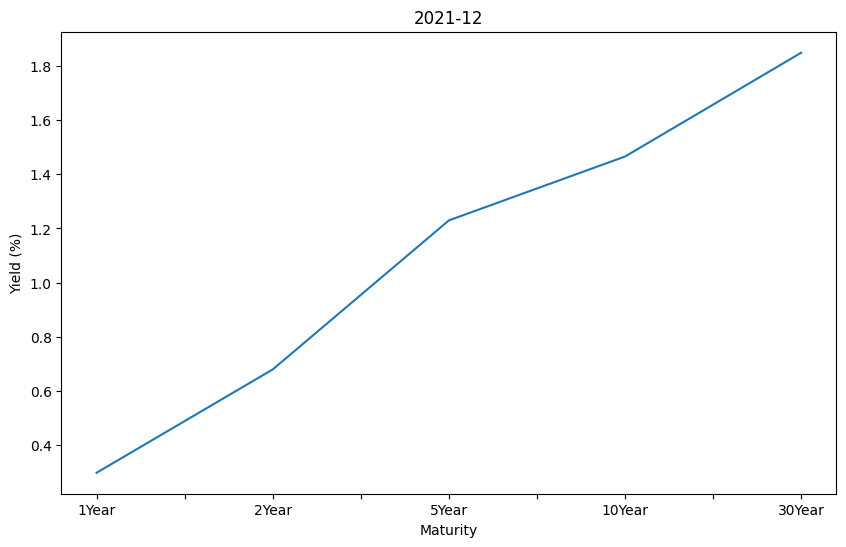

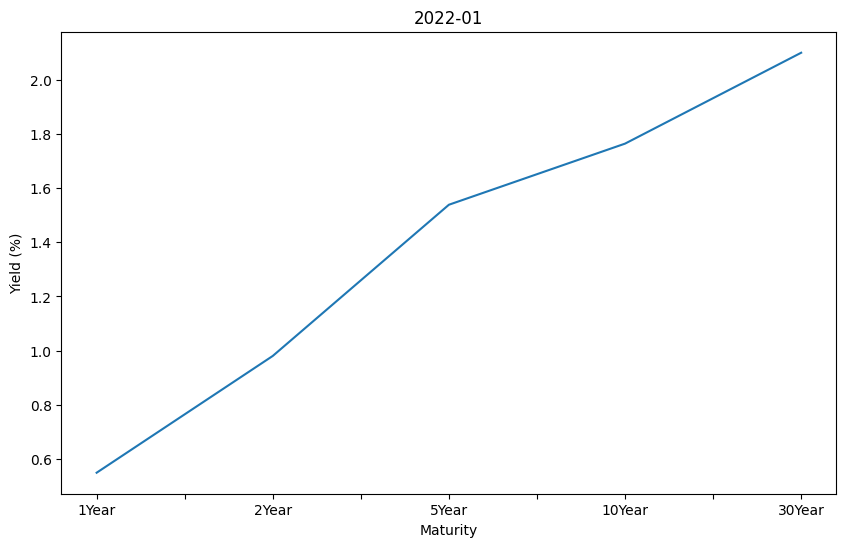

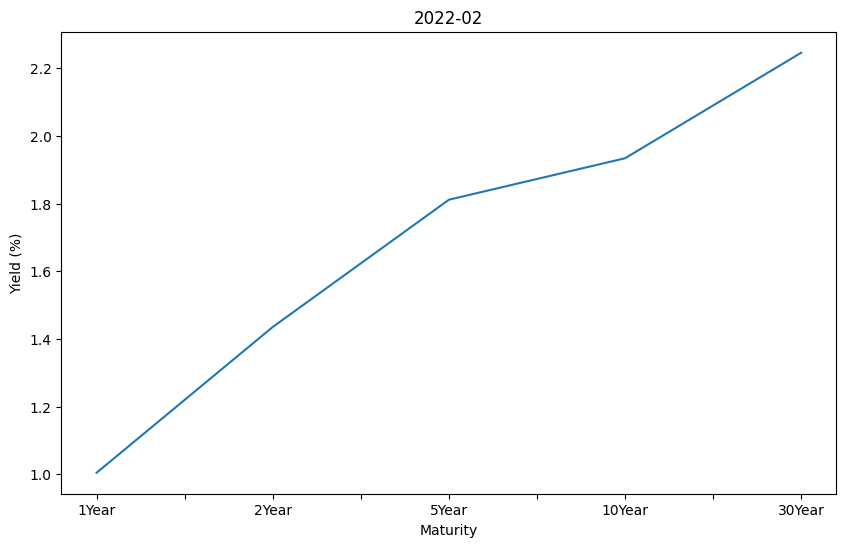

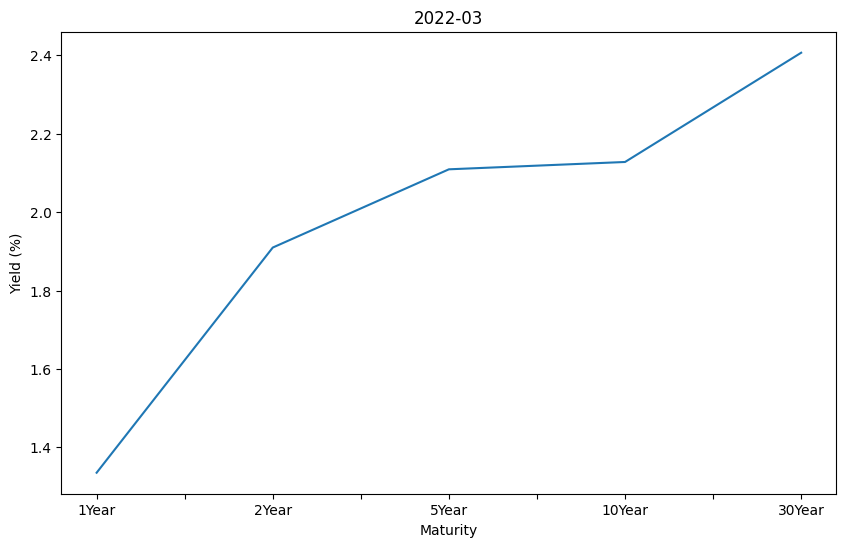

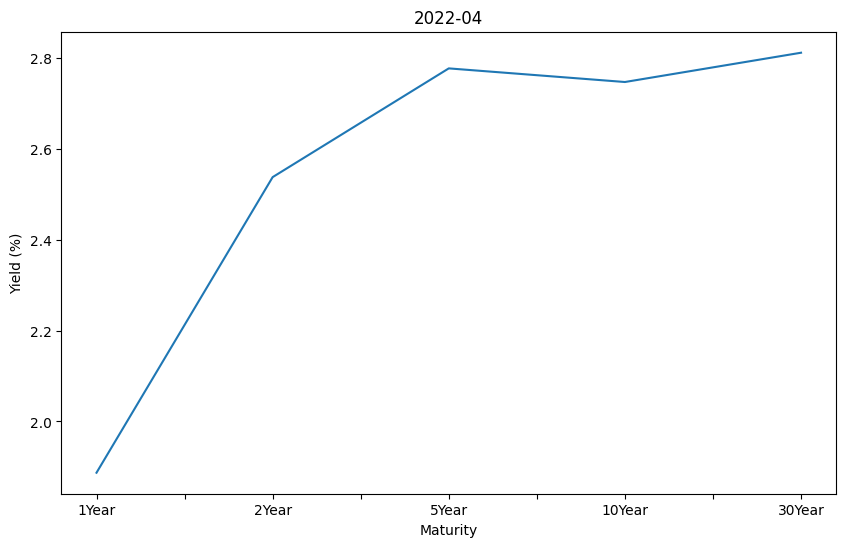

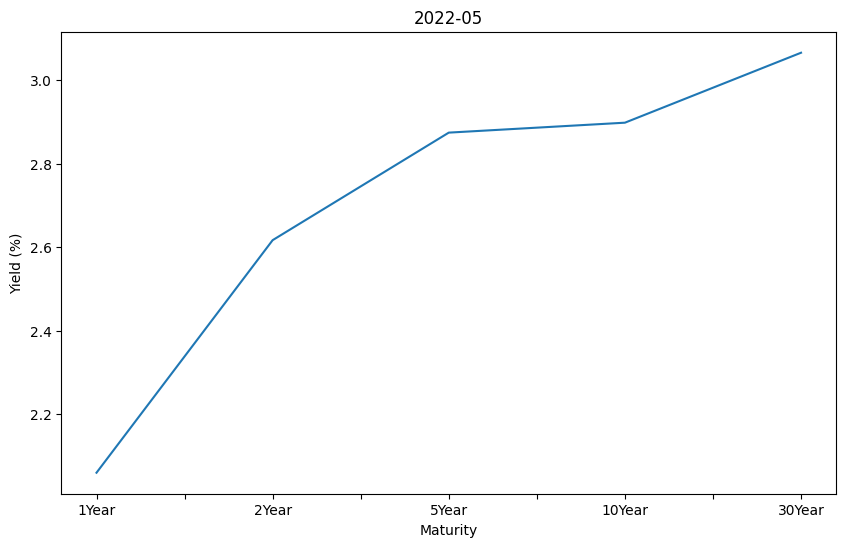

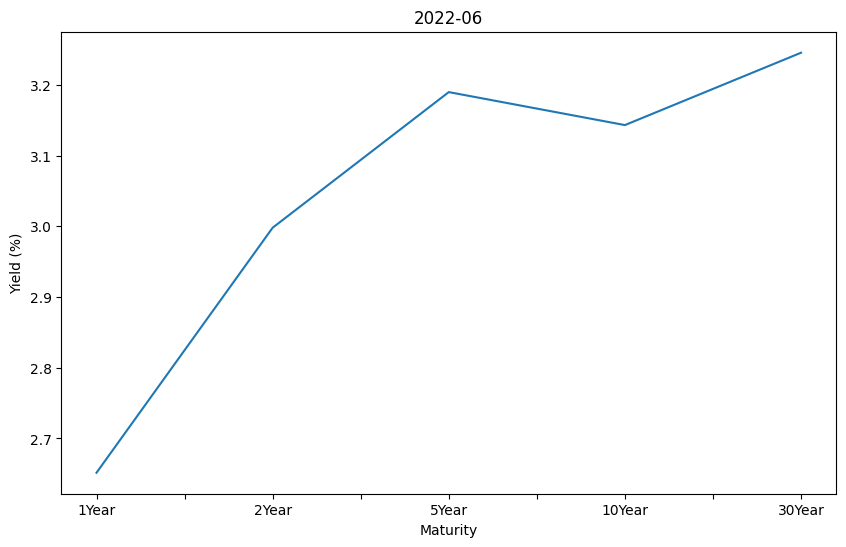

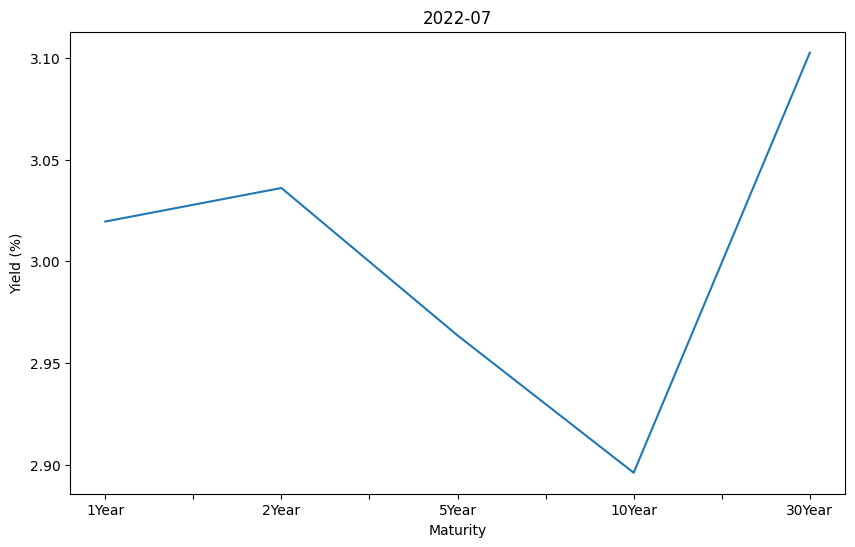

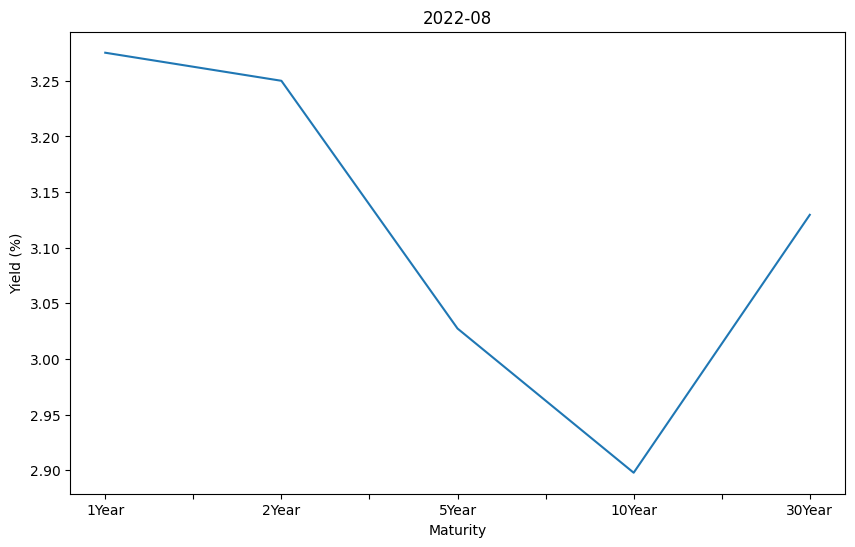

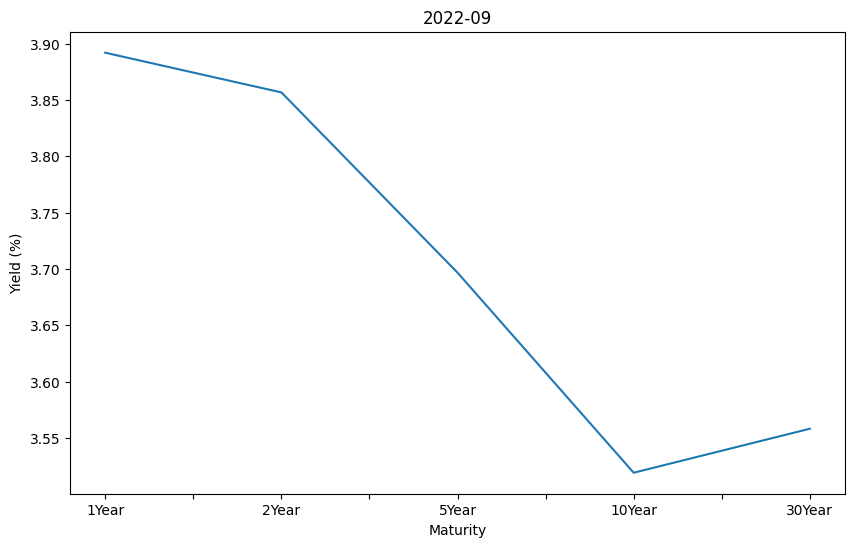

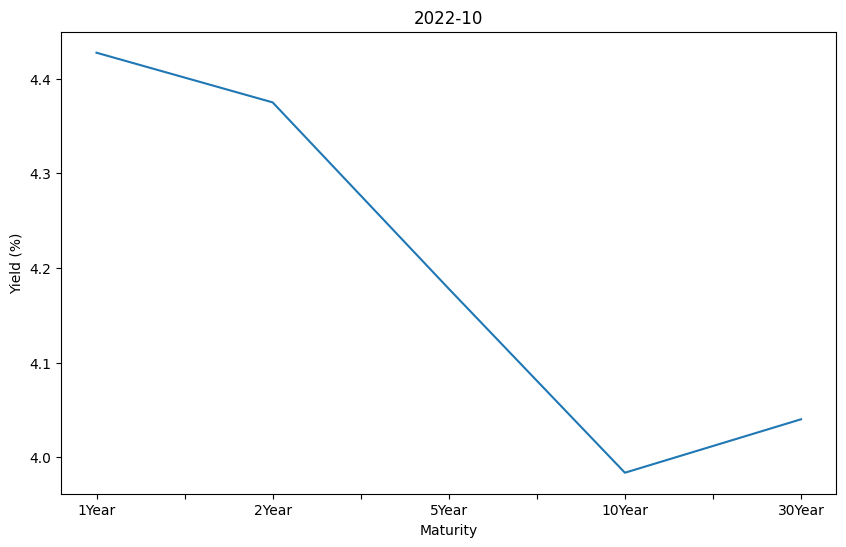

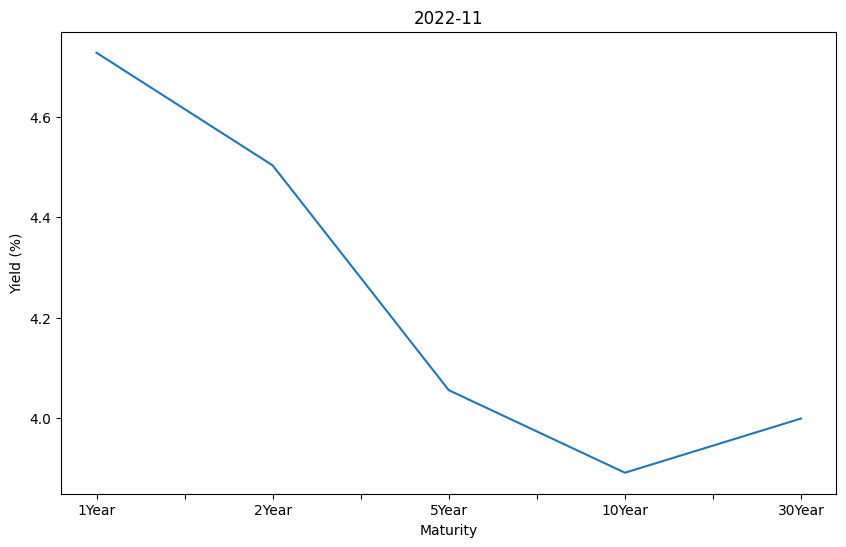

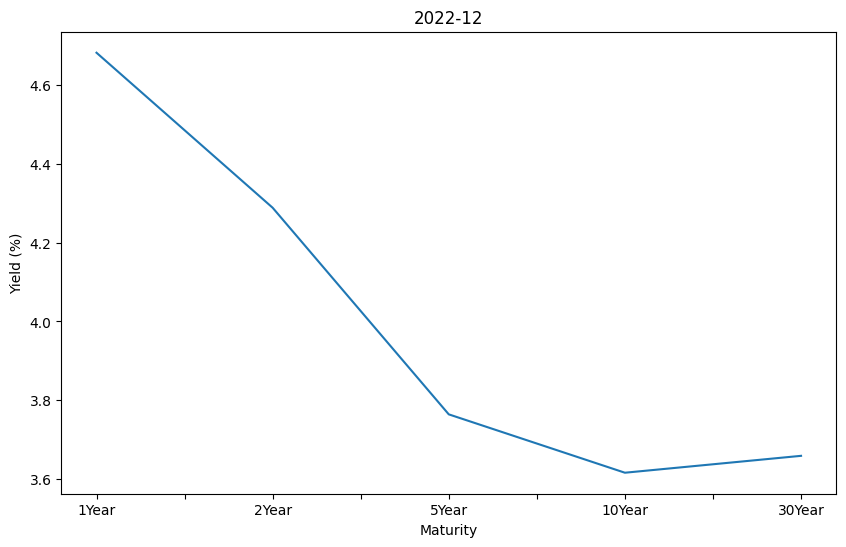

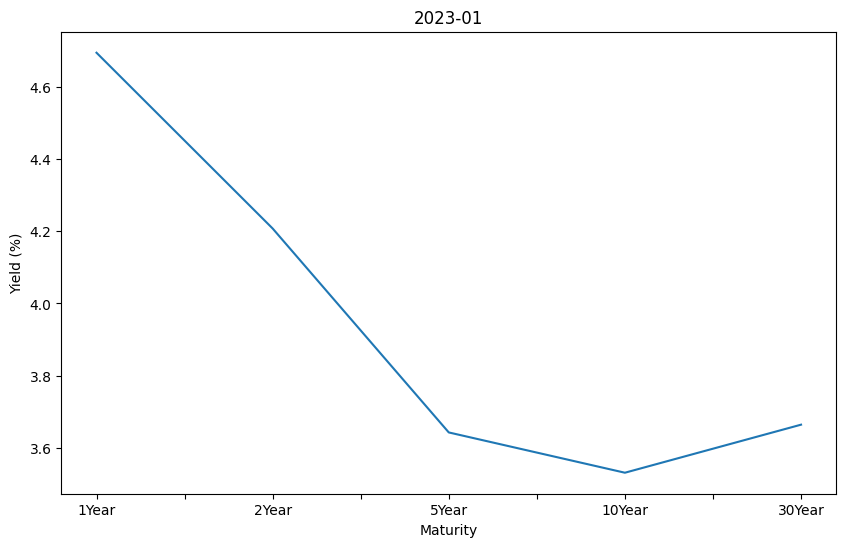

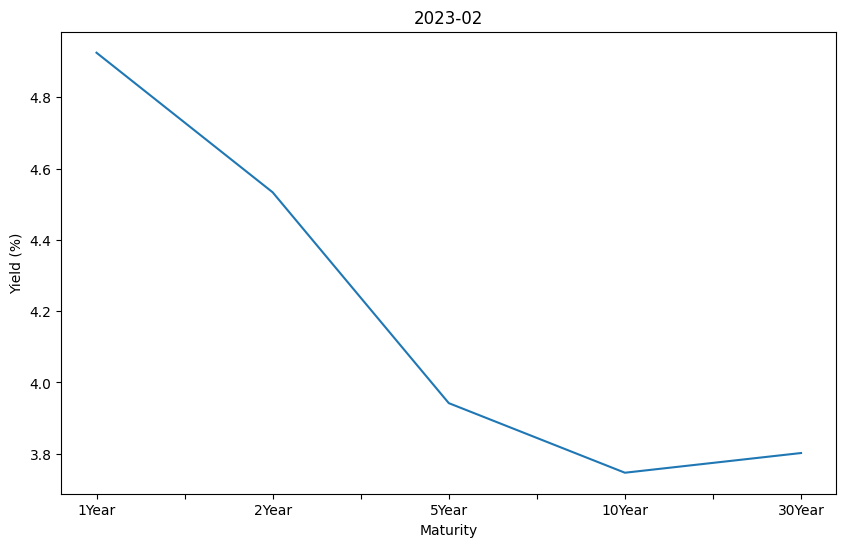

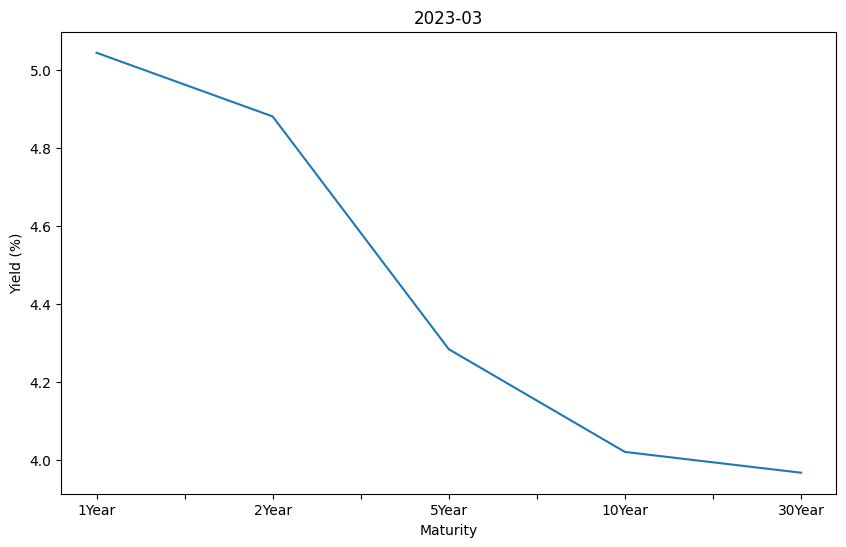

In [26]:
pp = PdfPages('US_treasury_plots.pdf')

for i, (index, row) in enumerate(US_treasury.iterrows()):
    fig, ax = subplots(figsize=(10, 6))
    row.plot.line(ax=ax, legend=False)
    ax.set_xlabel('Maturity')
    ax.set_ylabel('Yield (%)')
    ax.set_title(index.strftime('%Y-%m'))
    plt.show()
    pp.savefig(fig)
    plt.close()

### Question 4

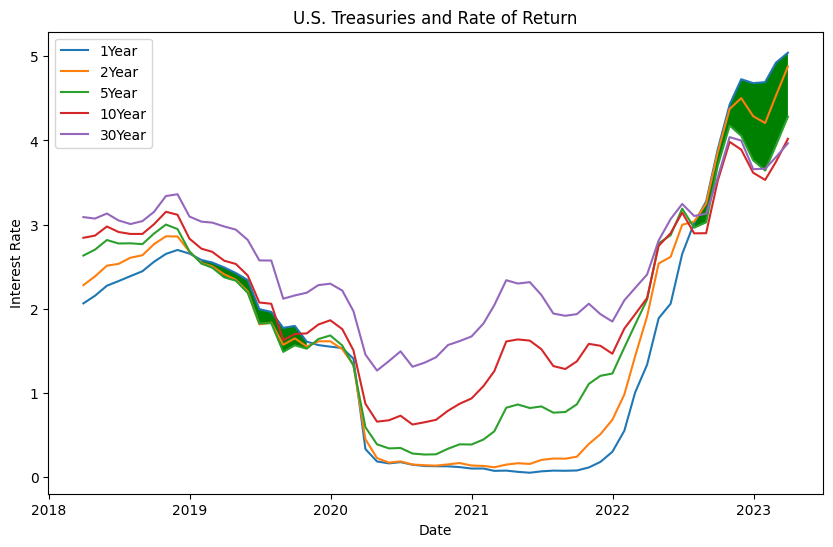

In [27]:

# Plot the variables
fig, ax = plt.subplots(figsize=(10, 6), sharex=True)

# Plot each column as a line
for column in US_treasury.columns:
    ax.plot(US_treasury.index, US_treasury[column], label=column)

# Add legend and axis labels
ax.legend(loc='upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Interest Rate')
ax.set_title('U.S. Treasuries and Rate of Return')


# Shade the regions where 5 Year rate is less than 1 year rate
mask = US_treasury['5Year'] < US_treasury['1Year']

# Fill the area between the 1-year and 5-year rates with green where the mask is True
ax.fill_between(US_treasury.index, US_treasury['1Year'], US_treasury['5Year'], where=mask, facecolor='green')

# Show the plot
plt.show()

pp.savefig(fig)
plt.close()

pp.close()